In [1]:
from astropy.io import ascii
import matplotlib.pyplot as plt
from scipy import interpolate
from shapely.geometry import LineString
from astropy.table import setdiff, Table, unique
import numpy as np
%run Utility.ipynb

In [2]:
# Measures the magnitude offset due to the distance of the source with respect to us
# dist -- The distance to the object

dist = 150
DM = 5 * np.log10(dist) - 5

# Mass column from the BT-Settl models

bt_mass = np.array([0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.072, 0.075, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])

# I magnitudes from the BT-Settl models with the magnitude offset applied

bt_I = np.array([14.291, 12.655, 11.737, 10.403, 9.648, 9.158, 8.800, 8.519, 8.462, 8.391, 8.270, 8.105, 8.209, 7.183, 6.466, 5.937, 5.533, 5.211, 4.916, 4.646, 4.417, 4.212, 4.016, 3.838, 3.669, 3.495])
bt_I = bt_I + DM

# J magnitudes from the BT-Settl models with the magnitude offset applied

bt_J = np.array([10.334, 9.488, 8.972, 8.020, 7.409, 6.976, 6.654, 6.409, 6.358, 6.297, 6.190, 6.061, 6.256, 5.516, 5.006, 4.636, 4.336, 4.098, 3.868, 3.658, 3.479, 3.315, 3.156, 3.012, 2.873, 2.730])
bt_J = bt_J + DM

# K magnitudes from the BT-Settl models with the magnitude offset applied

bt_K = np.array([9.381, 8.662, 8.173, 7.250, 6.653, 6.228, 5.913, 5.673, 5.621, 5.559, 5.452, 5.319, 5.510, 4.723, 4.155, 3.739, 3.427, 3.196, 2.987, 2.815, 2.677, 2.552, 2.430, 2.319, 2.213, 2.099])
bt_K = bt_K + DM

# I - J color from the BT-Settl models

bt_color_I_J = bt_I - bt_J

# I - K color from the BT-Settl models

bt_color_I_K = bt_I - bt_K

# Mass column from the AMES-Dusty models

ames_mass = np.array([0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.012, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.072, 0.075, 0.08, 0.09, 0.1, 0.11, 0.13, 0.15, 0.175, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.57, 0.6, 0.62, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.05, 1.1, 1.15, 1.2, 1.3, 1.4])

# I magnitudes from the AMES-Dusty models with the magnitude offset applied and with values corresponding to a mass bigger than 0.01 Solar-masses cut out from the array

ames_I = np.array([21.873, 19.972, 18.007, 16.633, 15.764, 15.106, 14.594, 14.079, 13.635, 13.237, 12.909, 12.427, 11.898, 11.219, 10.237, 9.510, 8.960, 8.742, 8.505, 8.467, 8.185, 8.333, 8.190, 7.767, 7.945, 7.734, 7.546, 7.331, 7.132, 6.765, 6.444, 6.183, 5.968, 5.786, 5.618, 5.407, 5.324, 5.277, 5.074, 4.971, 4.855, 4.751, 4.671, 4.543, 4.460, 4.361, 4.201, 4.110, 4.040, 3.885, 3.731])
ames_I = ames_I + DM
ames_I = ames_I[ames_mass <= 0.01]

# J magnitudes from the AMES-Dusty models with the magnitude offset applied and with values corresponding to a mass bigger than 0.01 Solar-masses cut out from the array

ames_J = np.array([18.000, 15.728, 14.030, 13.034, 12.371, 11.794, 11.336, 10.974, 10.673, 10.404, 10.189, 9.874, 9.475, 8.965, 8.160, 7.584, 7.069, 6.893, 6.686, 6.654, 6.353, 6.544, 6.420, 5.974, 6.268, 6.081, 5.916, 5.720, 5.544, 5.226, 4.946, 4.716, 4.529, 4.370, 4.224, 4.040, 3.968, 3.930, 3.762, 3.679, 3.588, 3.509, 3.452, 3.346, 3.288, 3.211, 3.104, 3.057, 3.018, 2.910, 2.790])
ames_J = ames_J + DM
ames_J = ames_J[ames_mass <= 0.01]

# K magnitudes from the AMES-Dusty models with the magnitude offset applied and with values corresponding to a mass bigger than 0.01 Solar-masses cut out from the array

ames_K = np.array([18.861, 15.359, 13.282, 12.287, 11.597, 11.013, 10.551, 10.204, 9.920, 9.666, 9.462, 9.133, 8.752, 8.255, 7.467, 6.873, 6.368, 6.193, 5.989, 5.958, 5.663, 5.849, 5.723, 5.285, 5.564, 5.373, 5.204, 5.000, 4.814, 4.470, 4.164, 3.913, 3.710, 3.538, 3.381, 3.185, 3.108, 3.067, 2.888, 2.799, 2.705, 2.624, 2.565, 2.463, 2.410, 2.338, 2.249, 2.212, 2.178, 2.091, 1.998])
ames_K = ames_K + DM
ames_K = ames_K[ames_mass <= 0.01]

# Only retain the array elements pertaining to masses below 0.01 Solar-masses

ames_mass = ames_mass[ames_mass <= 0.01]

# I - J color from the AMES-COND models

ames_color_I_J = ames_I - ames_J

# I - K color from the AMES-COND models

ames_color_I_K = ames_I - ames_K

# Interpolates the BT-Settl model mass values with its respective color arrays defined above
# This is used later on the figures to plot the points in the diagram where the respective mass thresholds are

color_model_bt_I_J = interpolate.interp1d(bt_mass, bt_color_I_J, kind = 'linear')
color_model_bt_I_K = interpolate.interp1d(bt_mass, bt_color_I_K, kind = 'linear')
mag_model_bt = interpolate.interp1d(bt_mass, bt_I, kind = 'linear')

# Interpolates the AMES-Dusty model mass values with its respective color arrays defined above
# This is used later on the figures to plot the points in the diagram where the respective mass thresholds are

color_model_ames_I_J = interpolate.interp1d(ames_mass, ames_color_I_J, kind = 'linear')
color_model_ames_I_K = interpolate.interp1d(ames_mass, ames_color_I_K, kind = 'linear')
mag_model_ames = interpolate.interp1d(ames_mass, ames_I, kind = 'linear')

# Creates a continuous array connecting both models
# This is used to build an interpolation at the ends of both models

full_mass = np.hstack((ames_mass, bt_mass))
full_color_I_J = np.hstack((ames_color_I_J, bt_color_I_J))
full_color_I_K = np.hstack((ames_color_I_K, bt_color_I_K))
full_mag = np.hstack((ames_I, bt_I))

# Interpolates the mass values of both models with the respective color arrays defined above
# This is used later on the figures to plot the points in the diagram where the respective mass thresholds are

full_color_interp_I_J = interpolate.interp1d(full_mass, full_color_I_J)
full_color_interp_I_K = interpolate.interp1d(full_mass, full_color_I_K)
full_mag_interp = interpolate.interp1d(full_mass, full_mag)

# The mass values to be highlighted by the BT-Settl interpolation on the diagrams

m = np.array([0.01, 0.1, 0.2, 0.5, 1])

# The mass values to be highlighted by the AMES-COND interpolation on the diagrams

n = np.array([0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.1, 0.2, 0.5, 1])

# The minimum and maximum values present in the BT-Settl model mass array

min_mass_bt = np.amin(bt_mass)
max_mass_bt = np.amax(bt_mass)

# Only keep the values in the m-array which fall within the BT-Settl model mass array's limits

m = m[np.where(np.logical_and(m >= min_mass_bt, m <= max_mass_bt))]

# The minimum and maximum values present in the AMES-COND model mass array

min_mass_ames = np.amin(ames_mass)
max_mass_ames = np.amax(ames_mass)

# Only keep the values in the n-array which fall within the AMES-COND model mass array's limits

n = n[np.where(np.logical_and(n >= min_mass_ames, n <= max_mass_ames))]

# The variable to be used to plot the stitch between both models on the figures (starts from the lowest BT-Settl mass and ends on the highest AMES-COND mass)

xnew = np.linspace(min_mass_bt, max_mass_ames)

In [3]:
# The catalogs used during this routine are opened and saved into an astropy-Table-object variable

candidates = ascii.read('/home/yobd/Documents/Selection/W-S-I+_Total_selection.dat') # The catalog of SUBARU sources which passed all selection criteria

#cat_c_t = ascii.read('/home/yobd/Documents/Photometry_Output/Full_Catalog_ZP_CT_New_Run.dat') # SUBARU Catalog with color-term and zero-point correction

# Path for aperture photometry based PSF-modelled catalogs
cat_c_t = ascii.read('/home/yobd/Documents/Photometry_Output/Full_Catalog_ZP_CT_Aper_PSF.dat') # SUBARU Catalog with color-term and zero-point correction

# Some of the entries had null values for their magnitudes (do not know why)
print(len(cat_c_t))
cat_c_t.remove_rows([cat_c_t['I_MAG_SUBARU'] == 0])
print(len(cat_c_t))

confirmed_members = ascii.read('/home/yobd/Documents/SourcesForAnalysis/final_confirmed_table.dat') # Confirmed CrA members from all papers about the region

dance = ascii.read('/home/yobd/Documents/CatalogsCrA/New_Run/DANCE.dat') # DANCE sources

denis = ascii.read('/home/yobd/Documents/CatalogsCrA/New_Run/DENIS_CrA.dat') # DENIS sources

DENIS_temp_cat = denis.filled(999.0)
DENIS_temp_cat = DENIS_temp_cat[DENIS_temp_cat['Iflg'] == 999.0]

denis = ascii.read('/home/yobd/Documents/CatalogsCrA/New_Run/DENIS_CrA.dat')
denis = setdiff(denis, DENIS_temp_cat, keys = ['RAJ2000', 'DEJ2000'])

denis.remove_rows([denis['e_Imag'] > 0.1])

gaia = ascii.read('/home/yobd/Documents/CatalogsCrA/New_Run/Gaia_DR3.dat') # Gaia sources

h_alpha = ascii.read('/home/yobd/Documents/Photometry_Output/N-A-L656_Full_Catalog_Aper_PSF.dat') # SUBARU H-Alpha soure catalog

# Removes the entries with bad flags, high excentricites and null flux values
print("H-Alpha catalog before cuts:", len(h_alpha))
h_alpha.remove_rows([h_alpha['ELLIPTICITY'] >= 0.5])
print("H-Alpha catalog after cuts:", len(h_alpha))

h_alpha.remove_rows([h_alpha['FLAGS'] != 0])

h_alpha.remove_rows([h_alpha['FLUX_PSF'] == 0])
print("H-Alpha catalog after cuts:", len(h_alpha))

h_alpha_bright_sources = ascii.read('/home/yobd/Documents/Selection/H_Alpha_Bright_Sources_Merge_After_Cut.dat') # The catalog of SUBARU sources with the brightest H-Alpha emission (built from the previous routine)

pm_selected_sources = ascii.read('/home/yobd/Documents/Selection/W-S-I+_Selected_Sources_PM.dat') # The catalog of SUBARU sources which passed proper-motions selection criteria

rejected_sources = ascii.read('/home/yobd/Documents/Selection/W-S-I+_Rejected_Sources_CMD_PLX_PM.dat') # The catalog of SUBARU sources which passed CMD but failed PM selection criteria

selected_sources = ascii.read('/home/yobd/Documents/Selection/W-S-I+_Selected_Sources_CMD_PLX_PM.dat') # The catalog of SUBARU sources which passed both CMD and PM selection criteria

spitzer = ascii.read('/home/yobd/Documents/CatalogsCrA/New_Run/SEIP Source List.dat') # Spitzer sources

two_mass = ascii.read('/home/yobd/Documents/CatalogsCrA/New_Run/2MASS All-Sky Point Source Catalog (PSC).dat') # 2MASS sources

VHS = ascii.read('/home/yobd/Documents/CatalogsCrA/New_Run/VSACatalog.dat') # VHSDR6 sources

wise = ascii.read('/home/yobd/Documents/CatalogsCrA/New_Run/AllWISE Source Catalog.dat') # AllWISE sources

# The different catalogs in the archive are cross-matched with the final SUBARU catalogs

%run Crossmatch.ipynb

#
# BEFORE I WAS RE-CROSS-MATCHING CAT_C_T WITH VHS BUT I HAVE SINCE REMOVED IT
#

# The I - J color of the SUBARU catalog

color_filter_I_J = np.array(cat_c_t['I_MAG_SUBARU'] - cat_c_t['jAperMag3'])

# The I-band of the SUBARU catalog

mag_filter = np.array(cat_c_t['I_MAG_SUBARU'])

# The VHSDR6 catalog has a default value for blank entries of < - 999999
# This removes those empty values

mag_filter = mag_filter[color_filter_I_J < 999]

color_filter_I_J = color_filter_I_J[color_filter_I_J < 999]

# This cycle removes the binary entries from the list of confirmed members of the CrA region

#temp_confirmed_table = Table.copy(confirmed_members)

#i = 0
#for name in confirmed_members['Names']:
#    if "(Binary)" in name:
#        temp_confirmed_table.remove_row(i)
#    else:
#        i += 1
#
#confirmed_members = temp_confirmed_table

# Cross-match between the CrA members and DENIS catalogs
# This is needed since the CrA members catalog has some cross-matches with DENIS that it does not have with our SUBARU data

cross_match_confirmed_members_denis = cross_match(confirmed_members, 'RA_ICRS', 'DE_ICRS', denis, 'RAJ2000', 'DEJ2000', 1, sep = True)

cross_match_confirmed_members_denis.sort('d2d')

cross_match_confirmed_members_denis = unique(cross_match_confirmed_members_denis, keys = ['RAJ2000_2', 'DEJ2000_2'], keep = 'first', silent = True)

# Cross-match with the VHSDR6 catalog in order to obtain J-band

cross_match_confirmed_members = cross_match(cross_match_confirmed_members_denis, 'RA_ICRS', 'DE_ICRS', VHS, 'ra', 'dec', 1, sep = True)

cross_match_confirmed_members = reset_main_catalog_columns(confirmed_members, cross_match_confirmed_members)

cross_match_confirmed_members.sort('d2d')

# Removes the duplicate entries from the cross-matched catalog
cross_match_confirmed_members = unique(cross_match_confirmed_members, keys = ['ra', 'dec'], keep = 'first', silent = True)

# Cross-match of the SUBARU-VHS catalog with the Confirmed Members catalog

cross_filter_confirmed_members = cross_match(cat_c_t, 'ra', 'dec', confirmed_members, 'RA_ICRS', 'DE_ICRS', 1, sep = True)

cross_filter_confirmed_members.sort('d2d')

# Removes the duplicate entries from the cross-matched catalog
cross_filter_confirmed_members = unique(cross_filter_confirmed_members, keys = ['RA_ICRS', 'DE_ICRS'], keep = 'first', silent = True)

ascii.write(cross_filter_confirmed_members, '/home/yobd/Documents/Temp/Cats/Confirmed_Members_SUBARU.dat', format = 'csv', overwrite = True)

# The column is renamed so that the two previous built catalogs can be vertically stacked

cross_filter_confirmed_members.rename_column('I_MAG_SUBARU', 'Imag')

# Removes the entries from the cross-match with the DENIS catalog which are present in the SUBARU catalog

cross_match_confirmed_members = setdiff(cross_match_confirmed_members, cross_filter_confirmed_members, keys = ['RA_ICRS', 'DE_ICRS'])

ascii.write(cross_match_confirmed_members, '/home/yobd/Documents/Temp/Cats/Confirmed_Members_DENIS.dat', format = 'csv', overwrite = True)

print("The number of CrA members with DENIS photometry inside our magnitude range:", len(cross_match_confirmed_members[cross_match_confirmed_members['Imag'] > np.amin(mag_filter)]))

print("The number of CrA members with Subaru photometry inside our magnitude range:", len(cross_filter_confirmed_members[cross_filter_confirmed_members['Imag'] > np.amin(mag_filter)]))

# They are vertically stacked so we have the most DANCE members with I-band possible

cross_match_confirmed_members = vstack([cross_match_confirmed_members, cross_filter_confirmed_members])

color_c_t_confirmed_members_I_J = np.array(cross_match_confirmed_members['Imag'] - cross_match_confirmed_members['jAperMag3'])

mag_c_t_confirmed_members = np.array(cross_match_confirmed_members['Imag'])

# The VHSDR6 catalog has a default value for blank entries of < - 999999
# This removes those empty values

mag_c_t_confirmed_members = mag_c_t_confirmed_members[color_c_t_confirmed_members_I_J < 999]

color_c_t_confirmed_members_I_J = color_c_t_confirmed_members_I_J[color_c_t_confirmed_members_I_J < 999]

# Cross-match between the DANCE and DENIS catalogs
# This is needed since the DANCE catalog has some cross-matches with DENIS that it does not have with our SUBARU data

cross_match_1 = cross_match(dance, 'RA_ICRS', 'DE_ICRS', denis, 'RAJ2000', 'DEJ2000', 1, sep = True)

cross_match_1.sort('d2d')

cross_match_1 = unique(cross_match_1, keys = ['RAJ2000', 'DEJ2000'], keep = 'first', silent = True)

# Cross-match with the VHSDR6 catalog in order to obtain J-band

cross_match_dance = cross_match(cross_match_1, 'RA_ICRS', 'DE_ICRS', VHS, 'ra', 'dec', 1, sep = True)

cross_match_dance = reset_main_catalog_columns(dance, cross_match_dance)

cross_match_dance.sort('d2d')

# Removes the duplicate entries from the cross-matched catalog
cross_match_dance = unique(cross_match_dance, keys = ['ra', 'dec'], keep = 'first', silent = True)

# Cross-match of the SUBARU-VHS catalog with the DANCE catalog

cross_match_filter_dance = cross_match(cat_c_t, 'ra', 'dec', dance, 'RA_ICRS', 'DE_ICRS', 1, sep = True)

cross_match_filter_dance.sort('d2d')

# Removes the duplicate entries from the cross-matched catalog
cross_match_filter_dance = unique(cross_match_filter_dance, keys = ['RA_ICRS', 'DE_ICRS'], keep = 'first', silent = True)

ascii.write(cross_match_filter_dance, '/home/yobd/Documents/Temp/Cats/DANCE_SUBARU.dat', format = 'csv', overwrite = True)

# The column is renamed so that the two previous built catalogs can be vertically stacked

cross_match_filter_dance.rename_column('I_MAG_SUBARU', 'Imag')

# Removes the entries from the cross-match with the DENIS catalog which are present in the SUBARU catalog

cross_match_dance = setdiff(cross_match_dance, cross_match_filter_dance, keys = ['RA_ICRS', 'DE_ICRS'])

ascii.write(cross_match_dance, '/home/yobd/Documents/Temp/Cats/DANCE_DENIS.dat', format = 'csv', overwrite = True)

# They are vertically stacked so we have the most DANCE members with I-band possible

cross_match_dance = vstack([cross_match_dance, cross_match_filter_dance])

color_c_t_dance_I_J = np.array(cross_match_dance['Imag'] - cross_match_dance['jAperMag3'])

mag_c_t_dance = np.array(cross_match_dance['Imag'])

# The VHSDR6 catalog has a default value for blank entries of < - 999999
# This removes those empty values

mag_c_t_dance = mag_c_t_dance[color_c_t_dance_I_J < 999]

color_c_t_dance_I_J = color_c_t_dance_I_J[color_c_t_dance_I_J < 999]

# This catalog is then cross-matched with the SUBARU H-Alpha catalog so that it can be plotted in the I - H-Alpha diagram

cross_match_dance_h_alpha = cross_match(cross_match_dance, 'ra', 'dec', h_alpha, 'ra', 'dec', 1, sep = True)

cross_match_dance_h_alpha.sort('d2d')
cross_match_dance_h_alpha = cross_match_dance_h_alpha.filled(999)
cross_match_dance_h_alpha.remove_rows([cross_match_dance_h_alpha['ra_2'] == 999])
cross_match_dance_h_alpha = unique(cross_match_dance_h_alpha, keys = ['ra_2', 'dec_2'], keep = 'first', silent = True)

cross_match_dance_h_alpha = reset_main_catalog_columns(h_alpha, cross_match_dance_h_alpha)

color_c_t_dance_h_alpha_I_J = np.array(cross_match_dance_h_alpha['Imag'] - cross_match_dance_h_alpha['jAperMag3'])

mag_c_t_dance_h_alpha = np.array(cross_match_dance_h_alpha['Imag'])

# The VHSDR6 catalog has a default value for blank entries of < - 999999
# This removes those empty values

mag_c_t_dance_h_alpha = mag_c_t_dance_h_alpha[color_c_t_dance_h_alpha_I_J < 999]

color_c_t_dance_h_alpha_I_J = color_c_t_dance_h_alpha_I_J[color_c_t_dance_h_alpha_I_J < 999]

cross_match_dance_gaia_selected = cross_match(selected_sources, 'ra', 'dec', dance, 'RA_ICRS', 'DE_ICRS', 1, sep = True)

cross_match_dance_gaia_selected.sort('d2d')

cross_match_dance_gaia_selected = reset_main_catalog_columns(selected_sources, cross_match_dance_gaia_selected)

cross_match_dance_gaia_selected = unique(cross_match_dance_gaia_selected, keys = ['RA_ICRS_2', 'DE_ICRS_2'], keep = 'first', silent = True)

color_dance_gaia_selected_I_J = np.array(cross_match_dance_gaia_selected['I_MAG_SUBARU'] - cross_match_dance_gaia_selected['jAperMag3'])

mag_dance_gaia_selected = np.array(cross_match_dance_gaia_selected['I_MAG_SUBARU'])

# Cross-match of the SUBARU-VHS catalog with the Gaia catalog

cross_match_gaia = cross_match(cat_c_t, 'ra', 'dec', gaia, 'RA_ICRS', 'DE_ICRS', 1, sep = True)

cross_match_gaia = reset_main_catalog_columns(cat_c_t, cross_match_gaia)

cross_match_gaia.sort('d2d')

# Removes the duplicate entries from the cross-matched catalog
cross_match_gaia = unique(cross_match_gaia, keys = ['RA_ICRS', 'DE_ICRS'], keep = 'first', silent = True)

color_c_t_gaia_I_J = np.array(cross_match_gaia['I_MAG_SUBARU'] - cross_match_gaia['jAperMag3'])

mag_c_t_gaia = np.array(cross_match_gaia['I_MAG_SUBARU'])

# The VHSDR6 catalog has a default value for blank entries of < - 999999
# This removes those empty values

mag_c_t_gaia = mag_c_t_gaia[color_c_t_gaia_I_J < 999]

color_c_t_gaia_I_J = color_c_t_gaia_I_J[color_c_t_gaia_I_J < 999]

# Empty rows for the parallax column in the Gaia catalog are filled with some number and then removed
# This creates a sub-catalog with only the Gaia entries with a parallax value

cross_match_gaia_w_parallaxes = cross_match_gaia.filled(999)

cross_match_gaia_w_parallaxes.remove_rows([cross_match_gaia_w_parallaxes['Plx'] == 999])

color_c_t_gaia_w_parallaxes_I_J = np.array(cross_match_gaia_w_parallaxes['I_MAG_SUBARU'] - cross_match_gaia_w_parallaxes['jAperMag3'])

mag_c_t_gaia_w_parallaxes = np.array(cross_match_gaia_w_parallaxes['I_MAG_SUBARU'])

# The VHSDR6 catalog has a default value for blank entries of < - 999999
# This removes those empty values

mag_c_t_gaia_w_parallaxes = mag_c_t_gaia_w_parallaxes[color_c_t_gaia_w_parallaxes_I_J < 999]

color_c_t_gaia_w_parallaxes_I_J = color_c_t_gaia_w_parallaxes_I_J[color_c_t_gaia_w_parallaxes_I_J < 999]

print("Length of Gaia sources:", len(cross_match_gaia))

print("Length of Gaia sources with parallaxes:", len(cross_match_gaia_w_parallaxes))

# Cross-match of the SUBARU-VHS catalog with the SUBARU H-Alpha catalog

cross_match_h_alpha = cross_match(h_alpha, 'ra', 'dec', cat_c_t, 'ra', 'dec', 1, sep = True)

cross_match_h_alpha = reset_main_catalog_columns(h_alpha, cross_match_h_alpha)

cross_match_h_alpha.sort('d2d')

# Removes the duplicate entries from the cross-matched catalog
cross_match_h_alpha = unique(cross_match_h_alpha, keys = ['ra_2', 'dec_2'], keep = 'first', silent = True)

color_c_t_h_alpha_I_J = np.array(cross_match_h_alpha['I_MAG_SUBARU'] - cross_match_h_alpha['jAperMag3'])

# The VHSDR6 catalog has a default value for blank entries of < - 999999
# This removes those empty values

cross_match_h_alpha.remove_rows([color_c_t_h_alpha_I_J > 999])

# Converting the SUBARU H-Alpha catalog flux values into magnitude values

cross_match_h_alpha['H_ALPHA'] = - 2.5 * np.log10(cross_match_h_alpha['FLUX_PSF'] / 180)

mag_c_t_h_alpha = np.array(cross_match_h_alpha['I_MAG_SUBARU'])

h_alpha_mag = cross_match_h_alpha['H_ALPHA']

# Creating the color and magnitude arrays of catalogs already created by previous routines

color_candidates_I_J = np.array(candidates['I_MAG_SUBARU'] - candidates['jAperMag3'])

mag_candidates = np.array(candidates['I_MAG_SUBARU'])

color_h_alpha_bright_sources_I_J = np.array(h_alpha_bright_sources['I_MAG_SUBARU'] - h_alpha_bright_sources['jAperMag3'])

mag_h_alpha_bright_sources = np.array(h_alpha_bright_sources['I_MAG_SUBARU'])

color_pm_selected_sources_I_J = np.array(pm_selected_sources['I_MAG_SUBARU'] - pm_selected_sources['jAperMag3'])

mag_pm_selected_sources = np.array(pm_selected_sources['I_MAG_SUBARU'])

color_rejected_sources_I_J = np.array(rejected_sources['I_MAG_SUBARU'] - rejected_sources['jAperMag3'])

mag_rejected_sources = np.array(rejected_sources['I_MAG_SUBARU'])

color_selected_sources_I_J = np.array(selected_sources['I_MAG_SUBARU'] - selected_sources['jAperMag3'])

mag_selected_sources = np.array(selected_sources['I_MAG_SUBARU'])

# The brightest source in the SUBARU I-band catalog

brightest_source_i_band = np.amin(mag_filter)

# Here, DANCE members brighter than the brightest SUBARU I-band sources are cut out
print("DANCe sources before magnitude cut:", len(color_c_t_dance_I_J))
color_c_t_dance_I_J = color_c_t_dance_I_J[mag_c_t_dance > brightest_source_i_band]
mag_c_t_dance = mag_c_t_dance[mag_c_t_dance > brightest_source_i_band]
print("DANCe sources after magnitude cut", len(color_c_t_dance_I_J))
# The brightest member in the DANCE catalog's magnitude and color, as well as the faintest one's
color_c_t_confirmed_members_I_J = color_c_t_confirmed_members_I_J[mag_c_t_confirmed_members > brightest_source_i_band]
mag_c_t_confirmed_members = mag_c_t_confirmed_members[mag_c_t_confirmed_members > brightest_source_i_band]

# This used the brightest and faintest member from DANCe to construct the selection line
#brightest_member = np.amin(mag_c_t_dance)
#brightest_member_color_I_J = color_c_t_dance_I_J[mag_c_t_dance == brightest_member]
#faintest_mag = np.amax(mag_c_t_dance)
#faintest_color_I_J = color_c_t_dance_I_J[mag_c_t_dance == faintest_mag]

# This used the brightest and faintest member from the CrA members to construct the selection line
#brightest_member = np.amin(mag_c_t_confirmed_members)
#brightest_member_color_I_J = color_c_t_confirmed_members_I_J[mag_c_t_confirmed_members == brightest_member]
#faintest_mag = np.amax(mag_c_t_confirmed_members)
#faintest_color_I_J = color_c_t_confirmed_members_I_J[mag_c_t_confirmed_members == faintest_mag]

# The bluest and second bluest CrA members are used to construct the selection line
brightest_member_color_I_J = np.amin(color_c_t_confirmed_members_I_J)
brightest_member = mag_c_t_confirmed_members[color_c_t_confirmed_members_I_J == brightest_member_color_I_J]
faintest_color_I_J = np.partition(color_c_t_confirmed_members_I_J, 2)[2]
faintest_mag = mag_c_t_confirmed_members[color_c_t_confirmed_members_I_J == faintest_color_I_J]

print("Brightest member color:", brightest_member_color_I_J)
print("Faintest color:", faintest_color_I_J)

21133
21133


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False
/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


H-Alpha catalog before cuts: 22969
H-Alpha catalog after cuts: 22614
H-Alpha catalog after cuts: 22556
The number of CrA members with DENIS photometry inside our magnitude range: 4
The number of CrA members with Subaru photometry inside our magnitude range: 4


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


Length of Gaia sources: 6888
Length of Gaia sources with parallaxes: 5977
DANCe sources before magnitude cut: 64
DANCe sources after magnitude cut 17
Brightest member color: 1.9878143386840819
Faintest color: 2.616599159240721


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


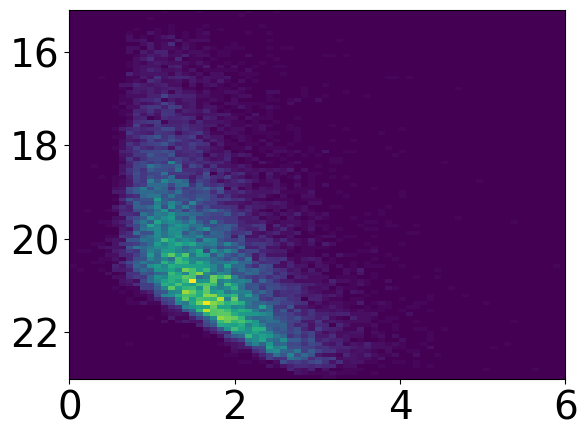

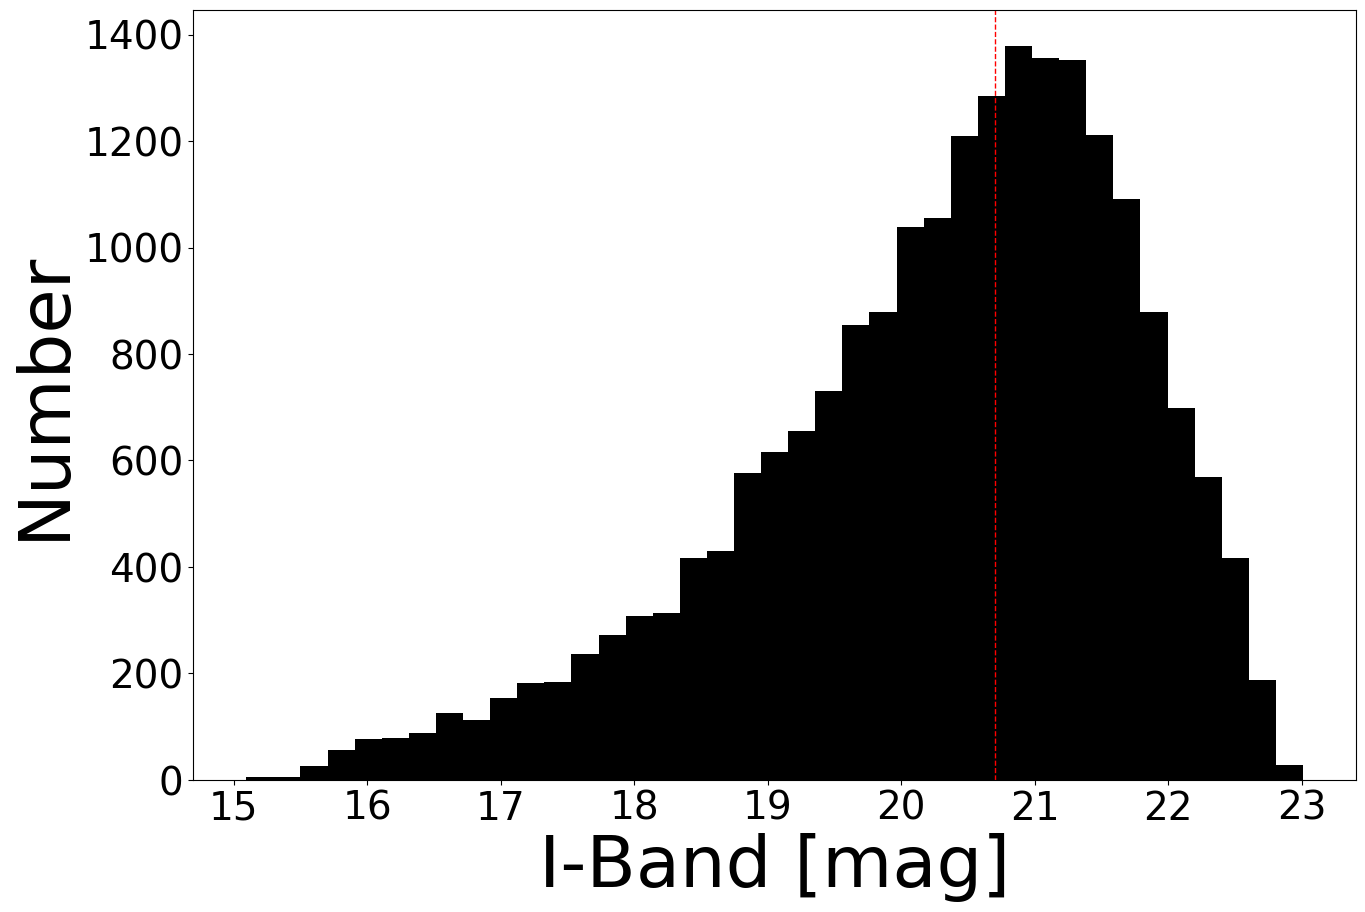

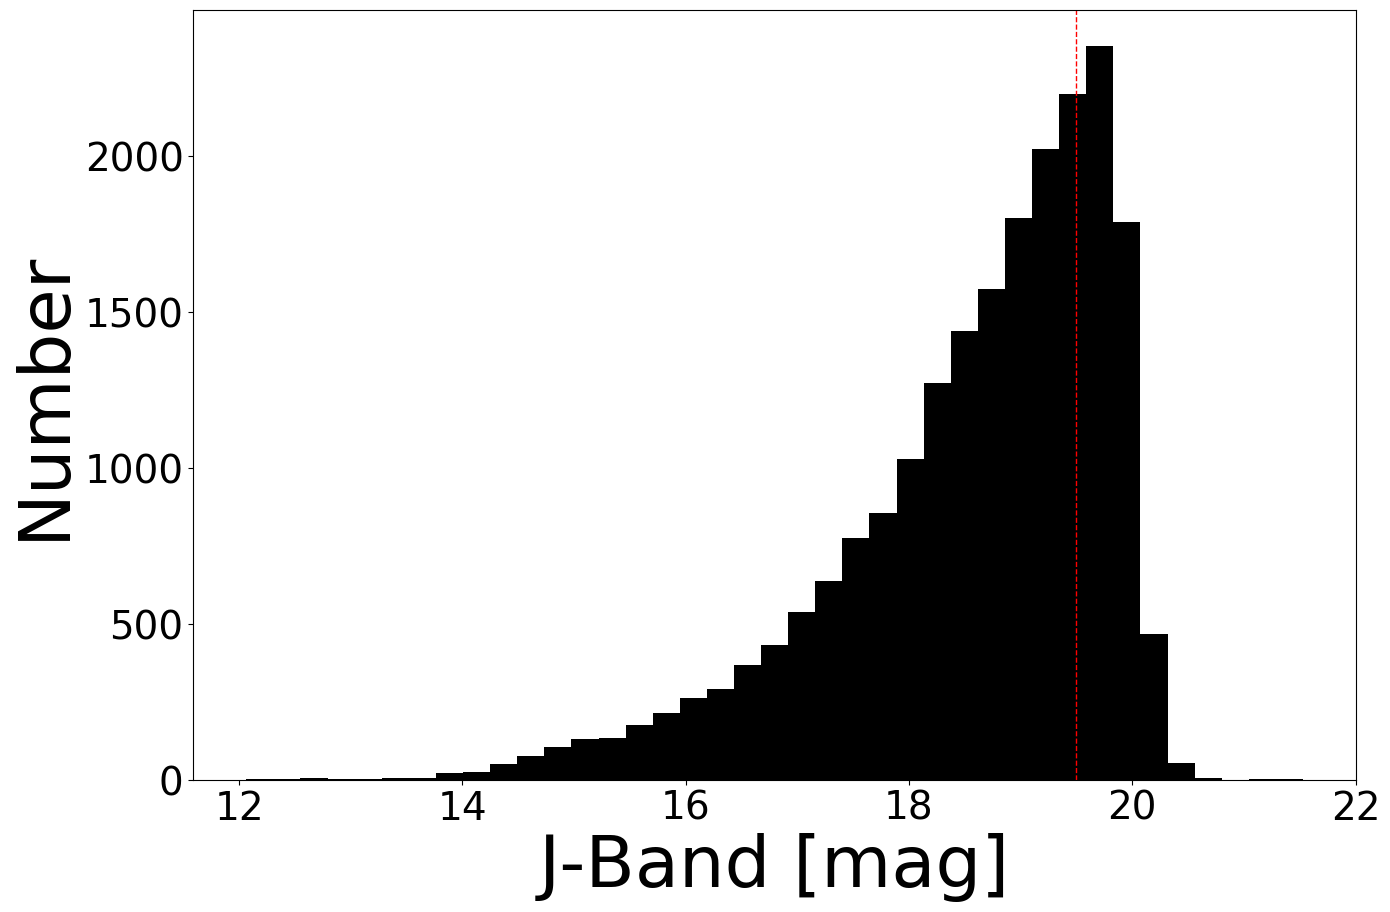

/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


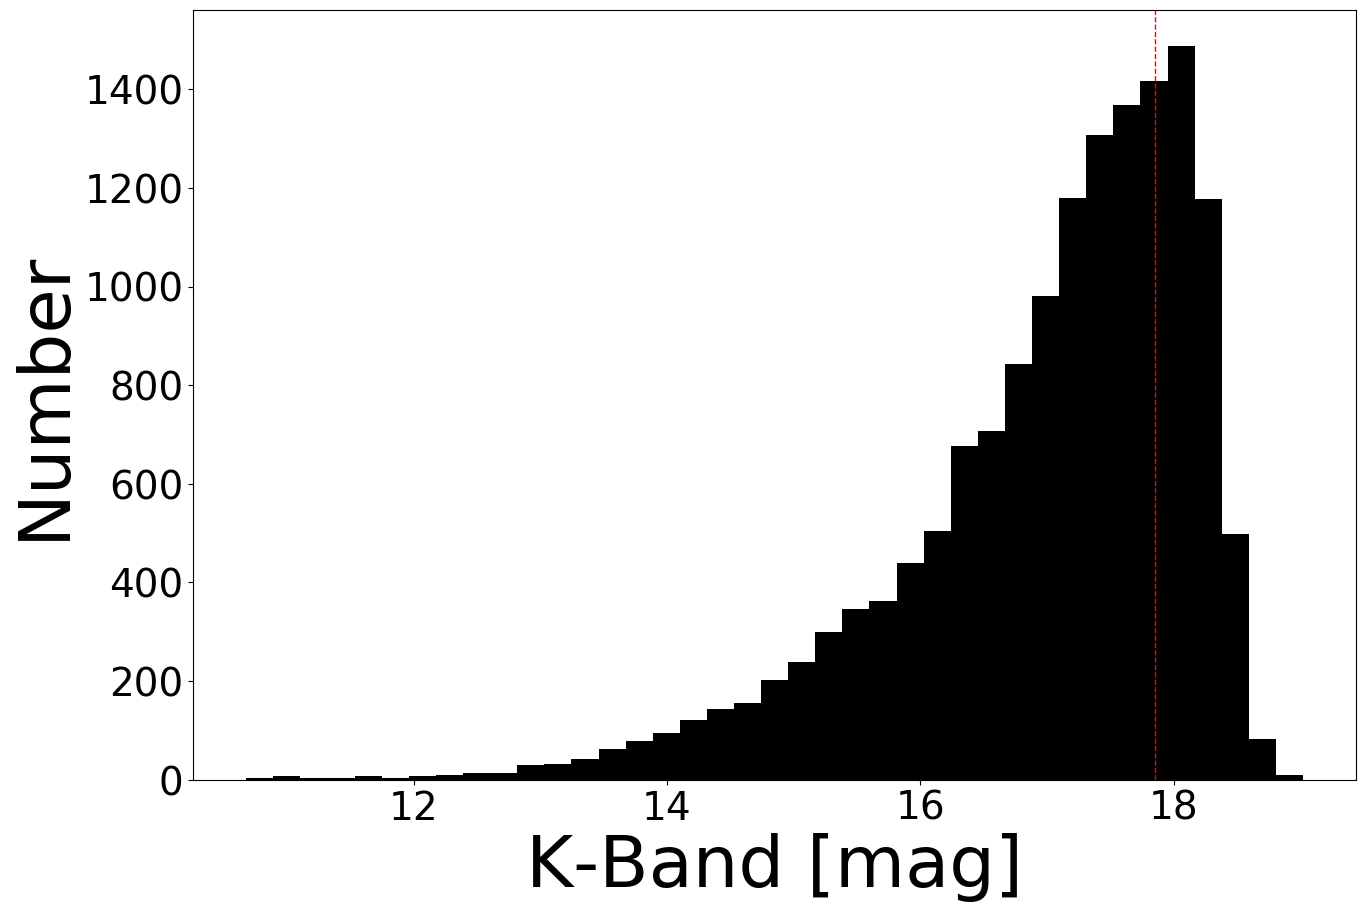

In [4]:
# Temporary catalog copy of the SUBARU catalog with color-term and zero-point correction
# This is so that changes made are not applied to the original catalog which will still be used in the later plots

temp_cat = Table.copy(cat_c_t)

# Here, the CrA is divided into two rectangular regions which represent the clouded portion of the star-forming region

# Defining one of the cloud regions in the CrA

temp_cat.remove_rows([temp_cat['ra'] > 285.81])

temp_cat.remove_rows([temp_cat['ra'] < 285.53])

temp_cat.remove_rows([temp_cat['dec'] < - 37.17])

temp_cat.remove_rows([temp_cat['dec'] > - 36.96])

# Defining the other cloud region in CrA

temp_cat_2 = Table.copy(cat_c_t)

temp_cat_2.remove_rows([temp_cat_2['ra'] > 285.58])

temp_cat_2.remove_rows([temp_cat_2['dec'] < - 36.98])

temp_cat_2.remove_rows([temp_cat_2['dec'] > - 36.87])

# The two cloud regions are saved on to a new catalog which becomes the catalog of sources which reside inside the CrA cloud

in_cloud = vstack([temp_cat, temp_cat_2])

# Removes possible duplicates (there should not be any, but it is good practice to do so anyway)

in_cloud = unique(in_cloud, keys = ['ra', 'dec'], keep = 'first')

# The catalog of sources outside the cloud region of CrA will be those belonging to the original catalog which did not make into the catalog of sources inside the cloud

out_cloud = setdiff(cat_c_t, in_cloud, keys = ['ra', 'dec'])

plt.rcdefaults()

plt.rc('xtick',labelsize = 28)
plt.rc('ytick',labelsize = 28)
plt.rcParams['font.size'] = 30
plt.rc('legend', fontsize = 20)

# Color-map of the SUBARU I-band sources in the I vs. I - J color-magnitude diagram

plt.figure(1)
plt.hist2d(color_filter_I_J, mag_filter, 100)
plt.gca().invert_yaxis()
plt.xlim(0, 6)
plt.show()

# The number of needed bins is calculated as the difference between the extreme values over the magnitude-step we desire

bin_number = np.int(np.absolute(( np.amin(mag_filter) - np.amax(mag_filter) ) / 0.2))

# Histogram of the I-band filter of the Suprime-Cam

plt.figure(2, figsize = (15, 10))
n_all, bins, patches = plt.hist(mag_filter, bins = bin_number, histtype = 'barstacked', color = 'black', label = 'All Sources')
#n_out, bins_out, patches_out = plt.hist(out_cloud['I_MAG_SUBARU'], bins = bin_number, histtype = 'barstacked', color = 'blue', label = 'Off-Cloud')
#n_in, bins_in, patches_in = plt.hist(in_cloud['I_MAG_SUBARU'], bins = bin_number, histtype = 'barstacked', color = 'red', label = 'In-Cloud')
plt.axvline(x = 20.7, color = 'r', linestyle = '--', linewidth = 1)
plt.xlabel("I-Band [mag]", fontsize = 'xx-large')
plt.ylabel("Number", fontsize = 'xx-large')
#plt.legend(fontsize = 30, loc = 2)
plt.show()

sus_obj = Table.copy(cat_c_t[cat_c_t['I_MAG_SUBARU'] > 24])

ascii.write(sus_obj, '/home/yobd/Documents/Temp/Cats/really_faint_sources.dat', format = 'csv', overwrite = True)

# Histogram of the J-band filter of the Suprime-Cam 

j_band = np.array(cat_c_t['jAperMag3'])

plt.figure(3, figsize = (15, 10))
n_all, bins, patches = plt.hist(j_band, bins = bin_number, histtype = 'barstacked', color = 'black', label = 'All Sources')
#n_out, bins_out, patches_out = plt.hist(out_cloud['jAperMag3'], bins = bin_number, histtype = 'barstacked', color = 'blue', label = 'Off-Cloud')
#n_in, bins_in, patches_in = plt.hist(in_cloud['jAperMag3'], bins = bin_number, histtype = 'barstacked', color = 'red', label = 'In-Cloud')
plt.axvline(x = 19.5, color = 'r', linestyle = '--', linewidth = 1)
plt.xlabel("J-Band [mag]", fontsize = 'xx-large')
plt.ylabel("Number", fontsize = 'xx-large')
#plt.legend(fontsize = 30, loc = 2)
plt.show()

# Histogram of the K-band filter of the Suprime-Cam

k_band = np.array(cat_c_t['ksAperMag3'])

k_band = k_band[k_band < 100]

k_band = k_band[k_band > - 100]

out_cloud.remove_rows([out_cloud['ksAperMag3'] < - 100])

in_cloud.remove_rows([in_cloud['ksAperMag3'] < - 100])

plt.figure(4, figsize = (15, 10))
n_all, bins, patches = plt.hist(k_band, bins = bin_number, histtype = 'barstacked', color = 'black', label = 'All Sources')
#n_out, bins_out, patches_out = plt.hist(out_cloud['ksAperMag3'], bins = bin_number, histtype = 'barstacked', color = 'blue', label = 'Off-Cloud')
#n_in, bins_in, patches_in = plt.hist(in_cloud['ksAperMag3'], bins = bin_number, histtype = 'barstacked', color = 'red', label = 'In-Cloud')
plt.axvline(x = 17.85, color = 'r', linestyle = '--', linewidth = 1)
plt.xlabel("K-Band [mag]", fontsize = 'xx-large')
plt.ylabel("Number", fontsize = 'xx-large')
#plt.legend(fontsize = 30, loc = 2)
plt.show()

Equation for the selection line: (-  0.6  -  -1.6200000000000045  -  -0.8000000000000007  x) /  0.20000000000000018


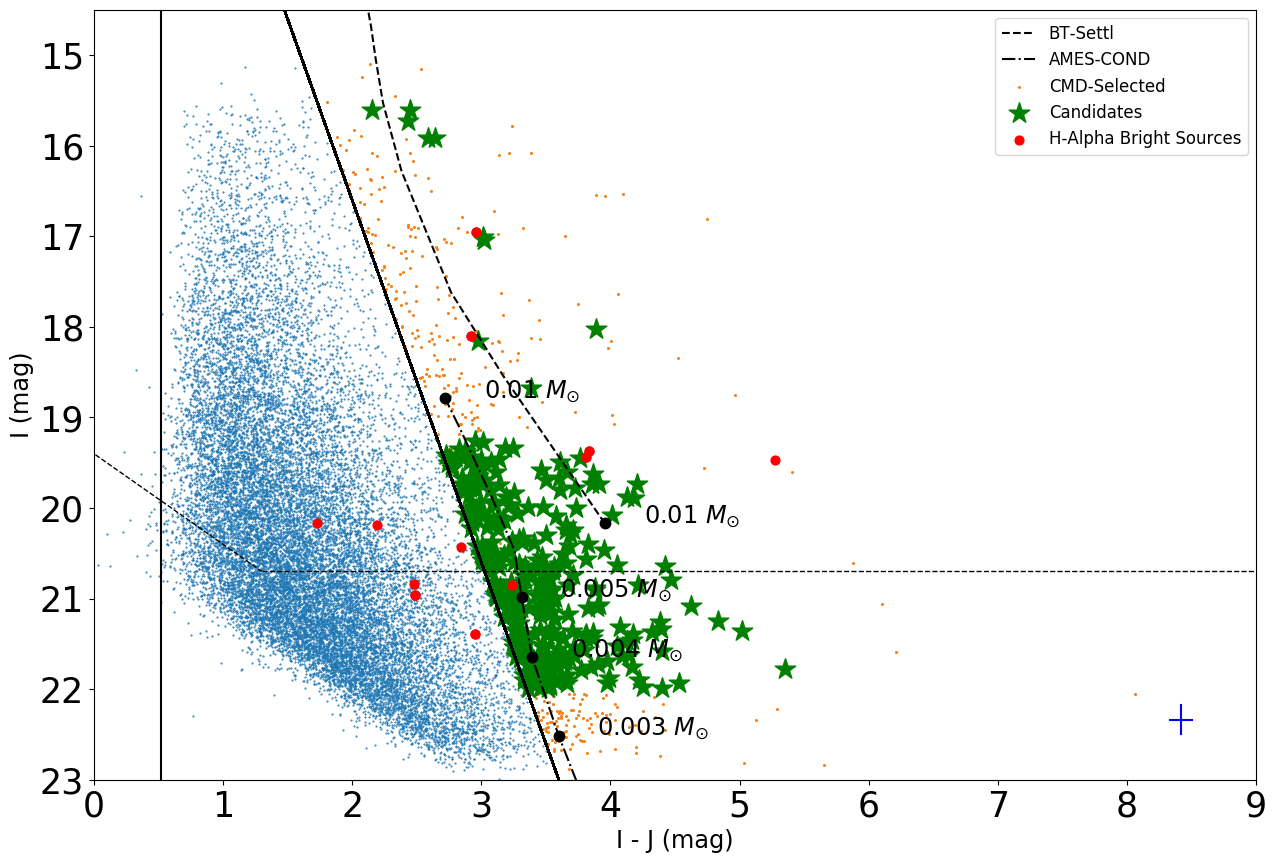

21133 21133


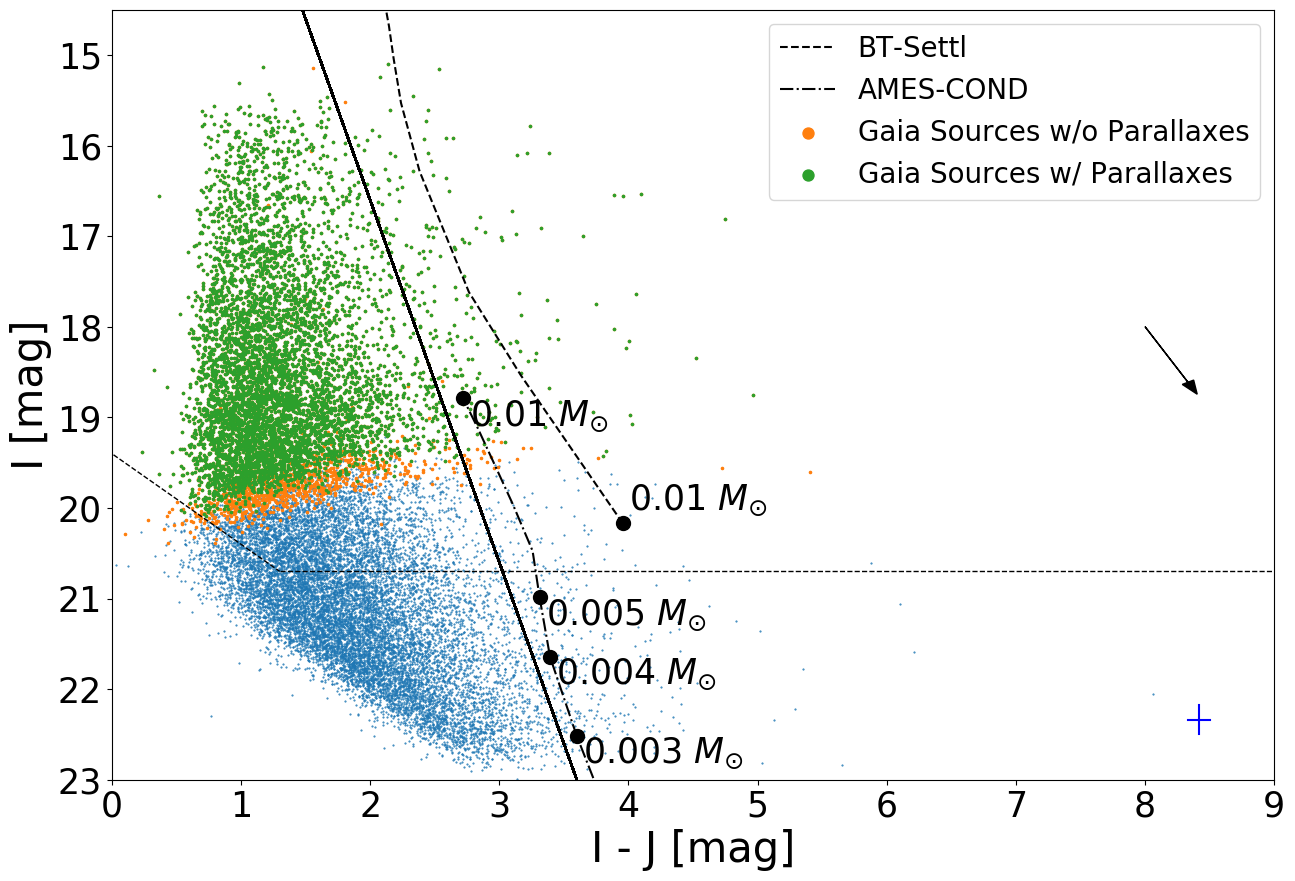

/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


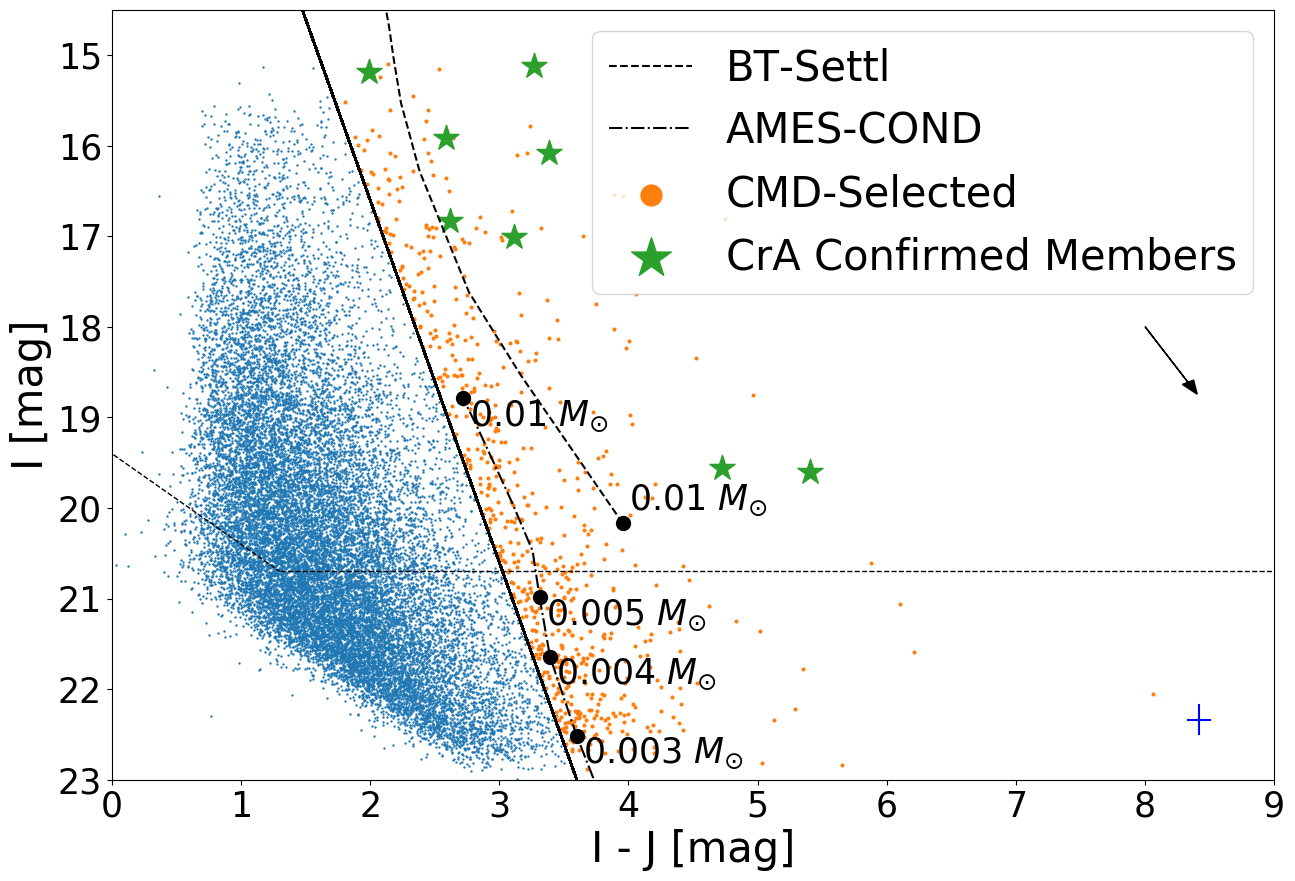

Length of faint sources selection: 313
Faint sources with masses lower than 5 Jupiters:         ra                 dec         ...    ksAperMag3Err     DETECTOR
------------------ ------------------- ... -------------------- --------
285.10005055581246  -36.99769571732514 ...  0.03097793646156788   Sophie
285.10029502771647  -36.95981331504893 ... 0.022839905694127083   Sophie
 285.1051582100314 -36.967562806712245 ... 0.014117836952209473   Sophie
 285.1071601484558  -36.95808706578386 ... 0.016513654962182045   Sophie
 285.1080448279727  -36.94262243426923 ...         -999999488.0   Sophie
 285.1104032703364  -36.95358572505205 ... 0.026623353362083435 Nausicaa
 285.1143384839494  -36.93987656222066 ...  0.03582315519452095 Nausicaa
 285.1151002709099  -36.97363247069649 ...  0.01521692518144846   Sophie
 285.1468031226084  -36.95723795789089 ...  0.03170051425695419 Nausicaa
 285.1508902637847 -36.908360512954275 ... 0.034128692001104355 Nausicaa
               ...                 .

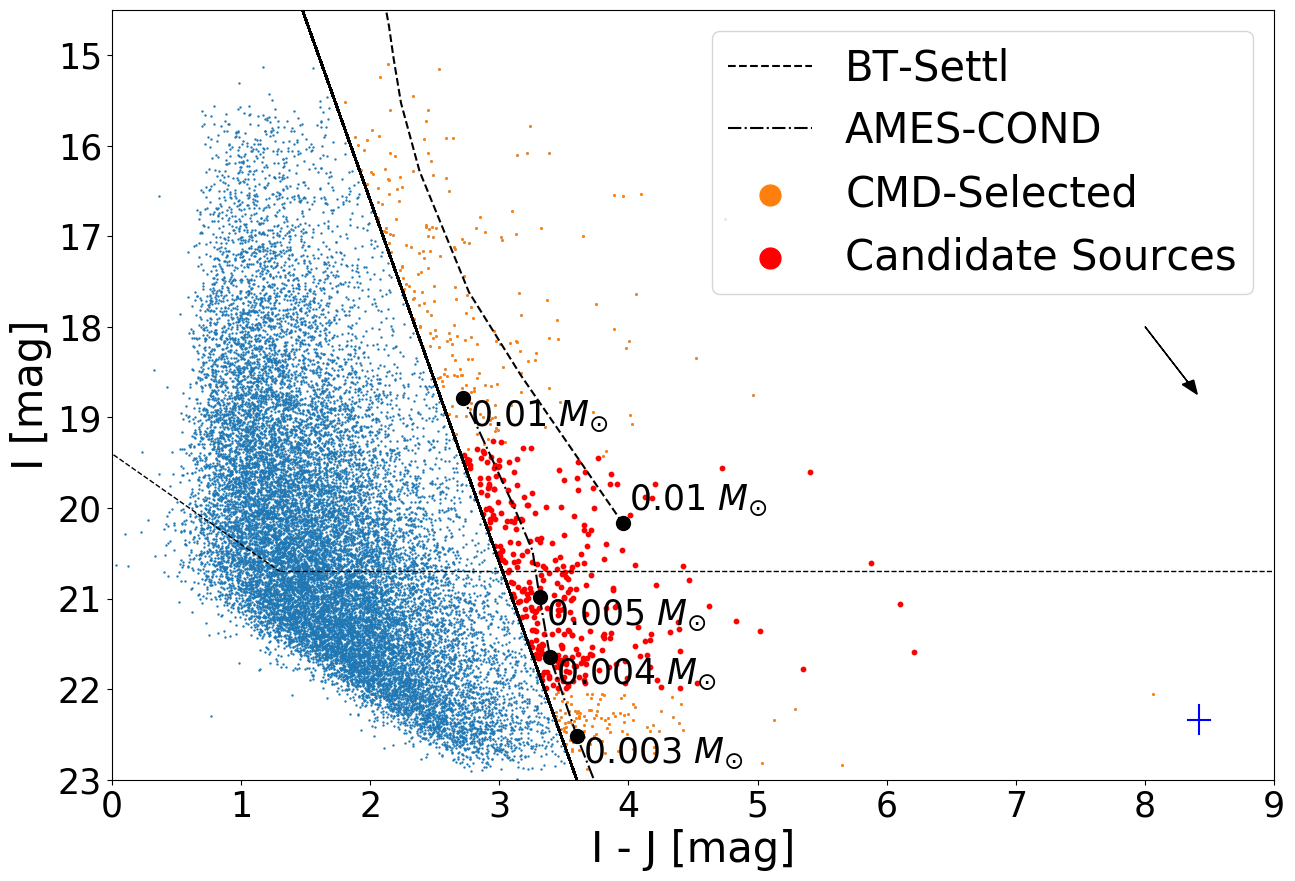

/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


Number of DANCe sources inside our magnitude range: 17
Number of DANCe sources in our W-S-I+ catalog: 10
Number of DANCe sources not in our W-S-I+ catalog: 7 7
Number of DANCe sources inside our selection region: 0
Number of DANCe sources which also pass our selection: 10
Number of DANCe sources in our W-S-I+ catalog which do not pass our selection: 0


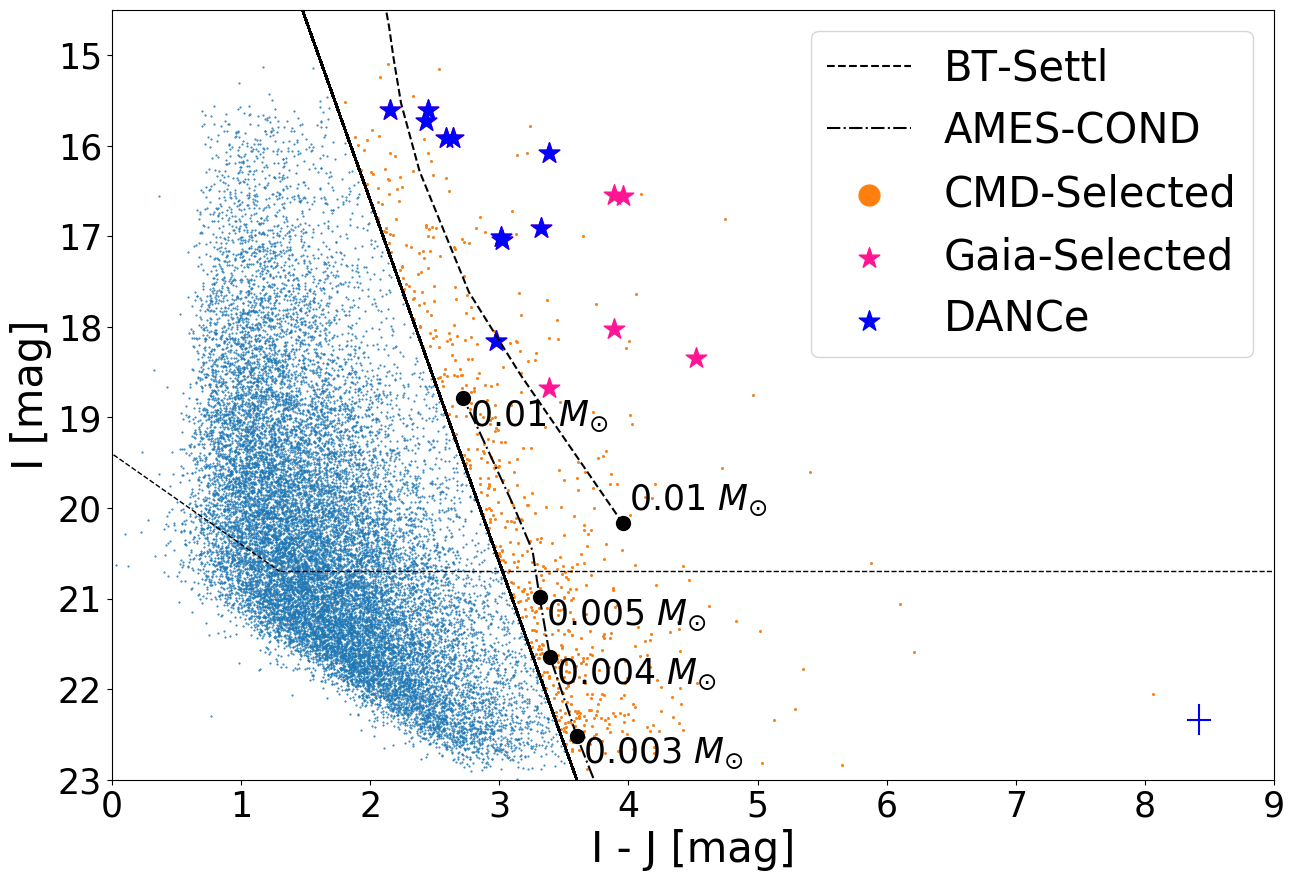

"\nplt.figure(10, figsize = (8, 10))\nplt.scatter(color_h_alpha_gaia_G_J, color_h_alpha_gaia_G_Ha - 24.6, marker = '.', s = 1, label = 'Gaia Sources')\nplt.scatter(color_dance_h_alpha_new_G_J, color_dance_h_alpha_new_G_Ha - 24.6, marker = 'D', label = 'DANCE Members')\n#plt.scatter(color_dance_h_alpha_new_G_J, color_dance_h_alpha_new_G_Ha - 22.6, marker = '*', label = 'DANCE Members')\nplt.plot(bt_G_J, bt_G_h_alpha, color = 'k')\nplt.xlabel('G - J', fontsize = 'xx-large')\nplt.ylabel('G - H_alpha', fontsize = 'xx-large')\n#plt.gca().invert_yaxis()\n#plt.xlim(0, 8)\n#plt.ylim(24, 12)\nplt.legend(fontsize = 'medium', loc = 1)\nplt.show()"

In [5]:
from scipy.optimize import fsolve

%run ext_lambda.ipynb
%run Crossmatch.ipynb

brightest_member_color_I_J = 3.4
brightest_member = 21.7
faintest_color_I_J = 3.6
faintest_mag = 22.5

# Coordinates of the selection line to be used later when plotting

line_x = [brightest_member_color_I_J, faintest_color_I_J]
line_y = [brightest_member, faintest_mag]

# Linear-fit of the spectroscopically confirmed members of CrA in the CMD

linear_fit = np.polyfit(color_c_t_confirmed_members_I_J, mag_c_t_confirmed_members, 1)

# Builds the poly function automatically
y = np.polyval(linear_fit, color_filter_I_J)

# The function returns the parameter values to describe a line connecting the coordinates above
#brightest_member_color_I_J = 2
#faintest_color_I_J = 3
#brightest_member = 14
#faintest_mag = 22
a_line, b_line, c_line = get_line_eq(brightest_member_color_I_J, faintest_color_I_J, brightest_member, faintest_mag)

# The region of the parameter space pertaining to redder, younger SUBARU I-band sources than those limited by the line described above

in_box = (mag_filter >= brightest_source_i_band) & (a_line * color_filter_I_J + b_line * mag_filter + c_line <= 0.1) #& (mag_filter <= faintest_mag)

# The region of the parameter space pertaining to redder, younger SUBARU H-Alpha sources than those limited by the line described before

h_alpha_in_box = (mag_c_t_h_alpha >= brightest_member) & (a_line * color_c_t_h_alpha_I_J + b_line * mag_c_t_h_alpha + c_line <= 0)

cat_c_t_in_box = Table.copy(cat_c_t[in_box])

# Sources of the I-band catalog which fall outside of the selection region

cat_c_t_out_box = setdiff(cat_c_t, cat_c_t_in_box, keys = ['ra', 'dec'])

#cat_c_t_in_box.remove_rows([cat_c_t_in_box['ksAperMag3'] > 100])

#cat_c_t_in_box.remove_rows([cat_c_t_in_box['ksAperMag3'] < - 100])

# Here, a replica of the SUBARU I-band sources' magnitude column is created in order to build separate SUBARU catalogs which fall inside the parameter space divided by the line and those that do not

mag_filter_table = Table()

mag_filter_table['I_MAG_SUBARU'] = mag_filter[in_box]

# The magnitude-limits derived from the histograms produced on the cell above

lim_mag_l_x = - 10, 20.7 - 19.4

lim_mag_l_y = 9.4, 20.7

lim_mag_r_x = 20.7 - 19.4, 10

lim_mag_r_y = 20.7, 20.7

# This part of the code generates the extinction line in the color-magnitude parameter space

# The reference wavelength for the Suprime-Cam I-band

#i_lam = 7635.0

# The reference wavelength for the DENIS I-band

i_lam = 7897.12

# The reference wavelength for the VHS J-band

j_lam = 12540.9

# The reference wavelength for the VHS K-band

k_lam = 21487.7

# The first coordinates correspond to a source with zero extinction and the second coordinates to a source with one mag of extinction

x_ext_0 = 0

y_ext_0 = 0

x_ext_1 = x_ext_0 + ext_lambda(i_lam, 1, 3.1) - ext_lambda(j_lam, 1, 3.1)

y_ext_1 = y_ext_0 + ext_lambda(i_lam, 1, 3.1)

# The line between the two points mentioned above

a_ext, b_ext, c_ext = get_line_eq(x_ext_0, x_ext_1, y_ext_0, y_ext_1)

# The module of the above line corresponds to one unity of extinction

one_mag = np.sqrt( ( (x_ext_0 - x_ext_1) ** 2) + ( (y_ext_0 - y_ext_1) ** 2) )

# The slope of the extinction line

slope = - a_ext / b_ext

# Errors for the plots

y_axis_error = np.nanmean(cat_c_t['I_MAG_SUBARU_ERR'])
x_axis_error = np.nanmean(cat_c_t['I_MAG_SUBARU_ERR'] + cat_c_t['jAperMag3Err'])

# Plots

plt.rcdefaults()

plt.rc('xtick',labelsize = 25)
plt.rc('ytick',labelsize = 25)
#plt.rcParams['font.size'] = 30

print("Equation for the selection line: (- ", 0.6, " - ", c_line, " - ", a_line, " x) / ", b_line)

plt.figure(1, figsize = (15, 10))
plt.scatter(color_filter_I_J, mag_filter, marker = '.', s = 1)#, label = 'i-Band Sources')
plt.scatter(color_filter_I_J[in_box], mag_filter[in_box], marker = '.', label = 'CMD-Selected', s = 5)
plt.scatter(color_candidates_I_J, mag_candidates, marker = '*', label = 'Candidates', s = 240, color = 'g')
plt.scatter(color_h_alpha_bright_sources_I_J, mag_h_alpha_bright_sources, label = 'H-Alpha Bright Sources', color = 'r', s = 40)
#plt.scatter(color_rejected_sources_I_J, mag_rejected_sources, marker = 'x', label = 'Rejected Sources')
#plt.scatter(in_cloud['I_MAG_SUBARU'] - in_cloud['jAperMag3'], in_cloud['I_MAG_SUBARU'], label = 'In-Cloud', s = 1)
#plt.scatter(out_cloud['I_MAG_SUBARU'] - out_cloud['jAperMag3'], out_cloud['I_MAG_SUBARU'], label = 'Out-Cloud', s = 1, alpha = 0.25)
#plt.scatter(color_c_t_dance_I_J, mag_c_t_dance, marker = 'D', s = 30, label = 'DANCE Members', color = 'm')
plt.plot(lim_mag_l_x, lim_mag_l_y, linestyle = '--', linewidth = 1, color = 'k')
plt.plot(lim_mag_r_x, lim_mag_r_y, linestyle = '--', linewidth = 1, color = 'k')
plt.plot(color_filter_I_J, (0.1 - c_line - a_line * color_filter_I_J) / b_line, color = 'k')
plt.plot(bt_color_I_J, bt_I, label = 'BT-Settl', color = 'k', linestyle = '--')
plt.plot(ames_color_I_J, ames_I, label = 'AMES-COND', color = 'k', linestyle = '-.')
plt.plot(color_model_bt_I_J(m), mag_model_bt(m), '.', markersize = 15, color = 'k')
for m1 in m: plt.text(color_model_bt_I_J(m1) + 0.3, mag_model_bt(m1), str(m1) + ' $M_{\odot}$', clip_on = True, fontsize = 'xx-large')
plt.plot(color_model_ames_I_J(n), mag_model_ames(n), '.', markersize = 15, color = 'k')
for n1 in n: plt.text(color_model_ames_I_J(n1) + 0.3, mag_model_ames(n1), str(n1) + ' $M_{\odot}$', clip_on = True, fontsize = 'xx-large')
plt.axvline(x = 0.52, ymin = -99, ymax = 99, color = 'k')
#plt.plot(color_filter_I_J, y, color = 'red', label = 'Linear-fit', linewidth = 1) ### THE LINEAR FIT ###
plt.arrow(5, 14, x_ext_0 - x_ext_1, y_ext_0 - y_ext_1, head_width = 0.1, color = 'k')
plt.xlabel('I - J (mag)', fontsize = 'xx-large')
plt.ylabel('I (mag)', fontsize = 'xx-large')
plt.gca().invert_yaxis()
plt.xlim(0, 9)
plt.ylim(23, 14.5)
x_err_bar_x = [plt.xlim()[1] - 0.5, plt.xlim()[1] - 0.5 - x_axis_error]
x_err_bar_y = [plt.ylim()[0] - 0.5 - 5 * y_axis_error / 2, plt.ylim()[0] - 0.5 - 5 * y_axis_error / 2]
y_err_bar_x = [plt.xlim()[1] - 0.5 - x_axis_error / 2, plt.xlim()[1] - 0.5 - x_axis_error / 2]
y_err_bar_y = [plt.ylim()[0] - 0.5 - 5 * y_axis_error, plt.ylim()[0] - 0.5]
plt.plot(x_err_bar_x, x_err_bar_y, color = 'b')
plt.plot(y_err_bar_x, y_err_bar_y, color = 'b')
plt.legend(fontsize = 'large', loc = 1)
plt.show()

print(len(cat_c_t), len(color_filter_I_J))

weird_sources = cat_c_t[color_filter_I_J < 0.52]

#ascii.write(weird_sources, '/home/yobd/Documents/SourcesForAnalysis/weirdCMDsources.dat', format = 'csv', overwrite = True)

plt.figure(2, figsize = (15, 10))
plt.scatter(color_filter_I_J, mag_filter, marker = '.', s = 1)#, label = 'i-Band Sources ZP and CT')
plt.scatter(color_c_t_gaia_I_J, mag_c_t_gaia, marker = '.', label = 'Gaia Sources w/o Parallaxes', s = 10)
plt.scatter(color_c_t_gaia_w_parallaxes_I_J, mag_c_t_gaia_w_parallaxes, marker = '.', label = 'Gaia Sources w/ Parallaxes', s = 10)
plt.plot(lim_mag_l_x, lim_mag_l_y, linestyle = '--', linewidth = 1, color = 'k')
plt.plot(lim_mag_r_x, lim_mag_r_y, linestyle = '--', linewidth = 1, color = 'k')
plt.plot(color_filter_I_J, (0.1 - c_line - a_line * color_filter_I_J) / b_line, color = 'k')
plt.plot(bt_color_I_J, bt_I, label = 'BT-Settl', color = 'k', linestyle = '--')
plt.plot(ames_color_I_J, ames_I, label = 'AMES-COND', color = 'k', linestyle = '-.')
#plt.plot(full_color_interp_I_J(xnew), full_mag_interp(xnew), color = 'k')
plt.plot(color_model_bt_I_J(m), mag_model_bt(m), '.', markersize = 20, color = 'k')
for m1 in m: plt.text(color_model_bt_I_J(m1) + 0.05, mag_model_bt(m1) - 0.15, str(m1) + ' $M_{\odot}$', clip_on = True, fontsize = 25)
plt.plot(color_model_ames_I_J(n), mag_model_ames(n), '.', markersize = 20, color = 'k')
for n1 in n: plt.text(color_model_ames_I_J(n1) + 0.05, mag_model_ames(n1) + 0.3, str(n1) + ' $M_{\odot}$', clip_on = True, fontsize = 25)
plt.arrow(8, 18, x_ext_1 - x_ext_0, y_ext_1 - y_ext_0, head_width = 0.1, color = 'k', label = 'Extinction')
plt.xlabel('I - J [mag]', fontsize = 30)
plt.ylabel('I [mag]', fontsize = 30)
plt.gca().invert_yaxis()
plt.xlim(0, 9)
plt.ylim(23, 14.5)
x_err_bar_x = [plt.xlim()[1] - 0.5, plt.xlim()[1] - 0.5 - x_axis_error]
x_err_bar_y = [plt.ylim()[0] - 0.5 - 5 * y_axis_error / 2, plt.ylim()[0] - 0.5 - 5 * y_axis_error / 2]
y_err_bar_x = [plt.xlim()[1] - 0.5 - x_axis_error / 2, plt.xlim()[1] - 0.5 - x_axis_error / 2]
y_err_bar_y = [plt.ylim()[0] - 0.5 - 5 * y_axis_error, plt.ylim()[0] - 0.5]
plt.plot(x_err_bar_x, x_err_bar_y, color = 'b')
plt.plot(y_err_bar_x, y_err_bar_y, color = 'b')
#plt.hlines(brightest_member - 0.5, brightest_member_color_I_J - 1, faintest_color_I_J)
#plt.hlines(faintest_mag + 0.5, brightest_member_color_I_J + 3, faintest_color_I_J)
plt.legend(fontsize = 20, loc = 1, markerscale = 5)
plt.show()

sus_members = Table.copy(cross_filter_confirmed_members)

sus_members.remove_rows([cross_filter_confirmed_members['Imag'] < 19])

#ascii.write(sus_members, '/home/yobd/Documents/Temp/Cats/sus_members.dat', format = 'csv', overwrite = True)

plt.figure(3, figsize = (15, 10))
plt.scatter(color_filter_I_J, mag_filter, marker = '.', s = 2)#, label = 'i-Band Sources ZP')
plt.scatter(color_filter_I_J[in_box], mag_filter[in_box], marker = '.', label = 'CMD-Selected', s = 15)
plt.scatter(color_c_t_confirmed_members_I_J, mag_c_t_confirmed_members, marker = '*', s = 360, label = 'CrA Confirmed Members')
#plt.scatter(color_c_t_dance_I_J, mag_c_t_dance, marker = 'D', s = 40, label = 'DANCE Sources')
plt.plot(lim_mag_l_x, lim_mag_l_y, linestyle = '--', linewidth = 1, color = 'k')
plt.plot(lim_mag_r_x, lim_mag_r_y, linestyle = '--', linewidth = 1, color = 'k')
plt.plot(color_filter_I_J, (0.1 - c_line - a_line * color_filter_I_J) / b_line, color = 'k')
plt.plot(bt_color_I_J, bt_I, label = 'BT-Settl', color = 'k', linestyle = '--')
plt.plot(ames_color_I_J, ames_I, label = 'AMES-COND', color = 'k', linestyle = '-.')
#plt.plot(full_color_interp_I_J(xnew), full_mag_interp(xnew), color = 'k')
plt.plot(color_model_bt_I_J(m), mag_model_bt(m), '.', markersize = 20, color = 'k')
for m1 in m: plt.text(color_model_bt_I_J(m1) + 0.05, mag_model_bt(m1) - 0.15, str(m1) + ' $M_{\odot}$', clip_on = True, fontsize = 25)
plt.plot(color_model_ames_I_J(n), mag_model_ames(n), '.', markersize = 20, color = 'k')
for n1 in n: plt.text(color_model_ames_I_J(n1) + 0.05, mag_model_ames(n1) + 0.3, str(n1) + ' $M_{\odot}$', clip_on = True, fontsize = 25)
#plt.plot(color_filter_I_J, y, color = 'red', label = 'Linear-fit', linewidth = 1) ### THE LINEAR FIT ###
plt.arrow(8, 18, x_ext_1 - x_ext_0, y_ext_1 - y_ext_0, head_width = 0.1, color = 'k', label = 'Extinction')
plt.xlabel('I - J [mag]', fontsize = 30)
plt.ylabel('I [mag]', fontsize = 30)
plt.gca().invert_yaxis()
plt.xlim(0, 9)
plt.ylim(23, 14.5)
x_err_bar_x = [plt.xlim()[1] - 0.5, plt.xlim()[1] - 0.5 - x_axis_error]
x_err_bar_y = [plt.ylim()[0] - 0.5 - 5 * y_axis_error / 2, plt.ylim()[0] - 0.5 - 5 * y_axis_error / 2]
y_err_bar_x = [plt.xlim()[1] - 0.5 - x_axis_error / 2, plt.xlim()[1] - 0.5 - x_axis_error / 2]
y_err_bar_y = [plt.ylim()[0] - 0.5 - 5 * y_axis_error, plt.ylim()[0] - 0.5]
plt.plot(x_err_bar_x, x_err_bar_y, color = 'b')
plt.plot(y_err_bar_x, y_err_bar_y, color = 'b')
#plt.hlines(brightest_member - 0.5, brightest_member_color_I_J - 1, faintest_color_I_J)
#plt.hlines(faintest_mag + 0.5, brightest_member_color_I_J + 3, faintest_color_I_J)
lgnd = plt.legend(fontsize = 30)
lgnd.legendHandles[2]._sizes = [900]
lgnd.legendHandles[3]._sizes = [900]
plt.show()

#print(cat_c_t_in_box)

#print(h_alpha_bright_sources)

## Esta parte faz cross-match das sources selecionadas por CMD com aquelas com bright H-Alpha emission selecionadas na cell a seguir a esta ##

#cat_c_t_in_box_h_alpha_brightest = cross_match(cat_c_t_in_box, 'ra', 'dec', h_alpha_bright_sources, 'ra', 'dec', 1, sep = True)

#print(cat_c_t_in_box_h_alpha_brightest)

#cat_c_t_in_box_h_alpha_brightest = reset_main_catalog_columns(cat_c_t_in_box, cat_c_t_in_box_h_alpha_brightest)

#cat_c_t_in_box_h_alpha_brightest.sort('d2d')

# Removes the duplicate entries from the cross-matched catalog
#cat_c_t_in_box_h_alpha_brightest = unique(cat_c_t_in_box_h_alpha_brightest, keys = ['ra_2', 'dec_2'], keep = 'first')

#cat_c_t_in_box['H_ALPHA'] = "No"

#cat_c_t_in_box_w_o_h_alpha = setdiff(cat_c_t_in_box, cat_c_t_in_box_h_alpha_brightest, keys = ['ra', 'dec'])

#cat_c_t_in_box_w_h_alpha = setdiff(cat_c_t_in_box, cat_c_t_in_box_w_o_h_alpha, keys = ['ra', 'dec'])

#cat_c_t_in_box_w_h_alpha['H_ALPHA'] = "Yes"

#cat_c_t_in_box = vstack([cat_c_t_in_box_w_o_h_alpha, cat_c_t_in_box_w_h_alpha])

# Writes the sources from the SUBARU I-band catalog with VHS J-band which pass I vs. I - J selection criteria
ascii.write(cat_c_t_in_box, '/home/yobd/Documents/Selection/W-S-I+_Selected_Sources_CMD.dat', format = 'csv', overwrite = True)

faint_sources = Table.copy(cat_c_t_in_box)

faint_sources.remove_rows([faint_sources['I_MAG_SUBARU'] < 19])

faint_sources.remove_rows([faint_sources['I_MAG_SUBARU'] > 22])

faint_sources_w_gaia = cross_match(faint_sources, 'ra', 'dec', cross_match_gaia_w_parallaxes, 'RA_ICRS', 'DE_ICRS', 1, sep = True)

faint_sources_w_gaia = reset_main_catalog_columns(faint_sources, faint_sources_w_gaia)

faint_sources_w_gaia.sort('d2d')

# Removes the duplicate entries from the cross-matched catalog
faint_sources_w_gaia = unique(faint_sources_w_gaia, keys = ['RA_ICRS', 'DE_ICRS'], keep = 'first')

faint_sources = setdiff(faint_sources, faint_sources_w_gaia, keys = ['ra', 'dec'])
print("Length of faint sources selection:", len(faint_sources))
ascii.write(faint_sources, '/home/yobd/Documents/Selection/W-S-I+_Selected_Faint_Sources.dat', format = 'csv')

print("Faint sources with masses lower than 5 Jupiters:", faint_sources[faint_sources['I_MAG_SUBARU'] > mag_model_ames(0.005)])

plt.figure(4, figsize = (15, 10))
plt.scatter(color_filter_I_J, mag_filter, marker = '.', s = 2)#, label = 'i-Band Sources ZP')
plt.scatter(color_filter_I_J[in_box], mag_filter[in_box], marker = '.', label = 'CMD-Selected', s = 5)
plt.scatter(faint_sources['I_MAG_SUBARU'] - faint_sources['jAperMag3'], faint_sources['I_MAG_SUBARU'], marker = '.', label = 'Candidate Sources', s = 40, color = 'r')
plt.plot(lim_mag_l_x, lim_mag_l_y, linestyle = '--', linewidth = 1, color = 'k')
plt.plot(lim_mag_r_x, lim_mag_r_y, linestyle = '--', linewidth = 1, color = 'k')
plt.plot(color_filter_I_J, (0.1 - c_line - a_line * color_filter_I_J) / b_line, color = 'k')
plt.plot(bt_color_I_J, bt_I, label = 'BT-Settl', color = 'k', linestyle = '--')
plt.plot(ames_color_I_J, ames_I, label = 'AMES-COND', color = 'k', linestyle = '-.')
#plt.plot(full_color_interp_I_J(xnew), full_mag_interp(xnew), color = 'k')
plt.plot(color_model_bt_I_J(m), mag_model_bt(m), '.', markersize = 20, color = 'k')
for m1 in m: plt.text(color_model_bt_I_J(m1) + 0.05, mag_model_bt(m1) - 0.15, str(m1) + ' $M_{\odot}$', clip_on = True, fontsize = 25)
plt.plot(color_model_ames_I_J(n), mag_model_ames(n), '.', markersize = 20, color = 'k')
for n1 in n: plt.text(color_model_ames_I_J(n1) + 0.05, mag_model_ames(n1) + 0.3, str(n1) + ' $M_{\odot}$', clip_on = True, fontsize = 25)
plt.arrow(8, 18, x_ext_1 - x_ext_0, y_ext_1 - y_ext_0, head_width = 0.1, color = 'k', label = 'Extinction')
plt.xlabel('I - J [mag]', fontsize = 30)
plt.ylabel('I [mag]', fontsize = 30)
plt.gca().invert_yaxis()
plt.xlim(0, 9)
plt.ylim(23, 14.5)
x_err_bar_x = [plt.xlim()[1] - 0.5, plt.xlim()[1] - 0.5 - x_axis_error]
x_err_bar_y = [plt.ylim()[0] - 0.5 - 5 * y_axis_error / 2, plt.ylim()[0] - 0.5 - 5 * y_axis_error / 2]
y_err_bar_x = [plt.xlim()[1] - 0.5 - x_axis_error / 2, plt.xlim()[1] - 0.5 - x_axis_error / 2]
y_err_bar_y = [plt.ylim()[0] - 0.5 - 5 * y_axis_error, plt.ylim()[0] - 0.5]
plt.plot(x_err_bar_x, x_err_bar_y, color = 'b')
plt.plot(y_err_bar_x, y_err_bar_y, color = 'b')
lgnd = plt.legend(fontsize = 30)
lgnd.legendHandles[2]._sizes = [900]
lgnd.legendHandles[3]._sizes = [900]
plt.show()

dance_denis = setdiff(cross_match_dance, cross_match_filter_dance, keys = ['RA_ICRS', 'DE_ICRS'])

dance_denis.remove_rows([dance_denis['Imag'] < brightest_source_i_band])

in_box_dance = (mag_c_t_dance >= brightest_member) & (a_line * color_c_t_dance_I_J + b_line * mag_c_t_dance + c_line <= 0.1) #& (mag_filter <= faintest_mag)

print("Number of DANCe sources inside our magnitude range:", len(color_c_t_dance_I_J))
print("Number of DANCe sources in our W-S-I+ catalog:", len(cross_match_filter_dance))
print("Number of DANCe sources not in our W-S-I+ catalog:", len(color_c_t_dance_I_J) - len(cross_match_filter_dance), len(dance_denis))
print("Number of DANCe sources inside our selection region:", len(color_c_t_dance_I_J[in_box_dance]))
print("Number of DANCe sources which also pass our selection:", len(color_dance_gaia_selected_I_J))
print("Number of DANCe sources in our W-S-I+ catalog which do not pass our selection:", len(cross_match_filter_dance) - len(color_dance_gaia_selected_I_J))

dance_not_selected = setdiff(cross_match_filter_dance, cross_match_dance_gaia_selected, keys = ['ra', 'dec'])

ascii.write(dance_not_selected, '/home/yobd/Documents/Selection/DANCe_not_selected.dat', format = 'csv', overwrite = True)

plt.figure(5, figsize = (15, 10))
plt.scatter(color_filter_I_J, mag_filter, marker = '.', s = 1)#, label = 'i-Band Sources')
plt.scatter(color_filter_I_J[in_box], mag_filter[in_box], marker = '.', label = 'CMD-Selected', s = 5)
plt.scatter(color_selected_sources_I_J, mag_selected_sources, marker = '*', label = 'Gaia-Selected', s = 240, color = 'deeppink')
#plt.scatter(dance_not_selected['I_MAG_SUBARU'] - dance_not_selected['jAperMag3'], dance_not_selected['I_MAG_SUBARU'], marker = '*', label = 'DANCE-Not-Selected', s = 240, color = 'r')
#plt.scatter(cross_match_filter_dance['Imag'] - cross_match_filter_dance['jAperMag3'], cross_match_filter_dance['Imag'], marker = 'D', s = 30, label = 'DANCe', color = 'r')
#plt.scatter(dance_denis['Imag'] - dance_denis['jAperMag3'], dance_denis['Imag'], marker = 'D', color = 'r')
plt.scatter(color_dance_gaia_selected_I_J, mag_dance_gaia_selected, marker = '*', s = 240, color = 'b', label = 'DANCe')
plt.plot(lim_mag_l_x, lim_mag_l_y, linestyle = '--', linewidth = 1, color = 'k')
plt.plot(lim_mag_r_x, lim_mag_r_y, linestyle = '--', linewidth = 1, color = 'k')
plt.plot(color_filter_I_J, (0.1 - c_line - a_line * color_filter_I_J) / b_line, color = 'k')
plt.plot(bt_color_I_J, bt_I, label = 'BT-Settl', color = 'k', linestyle = '--')
plt.plot(ames_color_I_J, ames_I, label = 'AMES-COND', color = 'k', linestyle = '-.')
plt.plot(color_model_bt_I_J(m), mag_model_bt(m), '.', markersize = 20, color = 'k')
for m1 in m: plt.text(color_model_bt_I_J(m1) + 0.05, mag_model_bt(m1) - 0.15, str(m1) + ' $M_{\odot}$', clip_on = True, fontsize = 25)
plt.plot(color_model_ames_I_J(n), mag_model_ames(n), '.', markersize = 20, color = 'k')
for n1 in n: plt.text(color_model_ames_I_J(n1) + 0.05, mag_model_ames(n1) + 0.3, str(n1) + ' $M_{\odot}$', clip_on = True, fontsize = 25)
plt.arrow(5, 14, x_ext_0 - x_ext_1, y_ext_0 - y_ext_1, head_width = 0.1, color = 'k')
plt.xlabel('I - J [mag]', fontsize = 30)
plt.ylabel('I [mag]', fontsize = 30)
plt.gca().invert_yaxis()
plt.xlim(0, 9)
plt.ylim(23, 14.5)
x_err_bar_x = [plt.xlim()[1] - 0.5, plt.xlim()[1] - 0.5 - x_axis_error]
x_err_bar_y = [plt.ylim()[0] - 0.5 - 5 * y_axis_error / 2, plt.ylim()[0] - 0.5 - 5 * y_axis_error / 2]
y_err_bar_x = [plt.xlim()[1] - 0.5 - x_axis_error / 2, plt.xlim()[1] - 0.5 - x_axis_error / 2]
y_err_bar_y = [plt.ylim()[0] - 0.5 - 5 * y_axis_error, plt.ylim()[0] - 0.5]
plt.plot(x_err_bar_x, x_err_bar_y, color = 'b')
plt.plot(y_err_bar_x, y_err_bar_y, color = 'b')
lgnd = plt.legend(fontsize = 30)
lgnd.legendHandles[2]._sizes = [900]
#lgnd.legendHandles[3]._sizes = [900]
plt.show()
# Mass column from the BT-Settl models for the H-Alpha parameter space

mass_h_alpha = np.array([0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.072, 0.075, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])

# H-Alpha magnitudes from the BT-Settl models with the magnitude offset applied

bt_h_alpha = np.array([16.967, 15.394, 14.369, 12.817, 11.957, 11.428, 11.050, 10.747, 10.686, 10.609, 10.479, 10.289, 10.326, 9.012, 8.026, 7.227, 6.639, 6.141, 5.693, 5.291, 4.973, 4.707, 4.472, 4.268, 4.078, 3.887])
bt_h_alpha = bt_h_alpha + DM

# The I - H-Alpha color of the above catalog

bt_I_h_alpha = bt_I - bt_h_alpha

# Cross-match of the SUBARU I-band and H-Alpha, VHS catalog with the DANCE catalog
# This is so we can plot the DANCE members in the I - H-Alpha vs. I - J parameter space

cross_match_h_alpha_dance = cross_match(cross_match_h_alpha, 'ra', 'dec', dance, 'RA_ICRS', 'DE_ICRS', 1, sep = True)

cross_match_h_alpha_dance = reset_main_catalog_columns(h_alpha, cross_match_h_alpha_dance)

cross_match_h_alpha_dance.sort('d2d')

# Removes the duplicate entries from the cross-matched catalog
cross_match_h_alpha_dance = unique(cross_match_h_alpha_dance, keys = ['RA_ICRS', 'DE_ICRS'], keep = 'first')

# G magnitudes from the BT-Settl models with the magnitude offset applied

bt_G = np.array([15.473, 14.030, 13.194, 11.915, 11.169, 10.681, 10.324, 10.044, 9.987, 9.916, 9.796, 9.631, 9.736, 8.674, 7.890, 7.266, 6.776, 6.363, 5.981, 5.654, 5.365, 5.114, 4.883, 4.677, 4.483, 4.286])
bt_G = bt_G + DM

# G - J color from the BT-Settl models

bt_G_J = bt_G - bt_J

# G - H-Alpha color from the BT-Settl models

bt_G_h_alpha = bt_G - bt_h_alpha
'''
plt.figure(10, figsize = (8, 10))
plt.scatter(color_h_alpha_gaia_G_J, color_h_alpha_gaia_G_Ha - 24.6, marker = '.', s = 1, label = 'Gaia Sources')
plt.scatter(color_dance_h_alpha_new_G_J, color_dance_h_alpha_new_G_Ha - 24.6, marker = 'D', label = 'DANCE Members')
#plt.scatter(color_dance_h_alpha_new_G_J, color_dance_h_alpha_new_G_Ha - 22.6, marker = '*', label = 'DANCE Members')
plt.plot(bt_G_J, bt_G_h_alpha, color = 'k')
plt.xlabel('G - J', fontsize = 'xx-large')
plt.ylabel('G - H_alpha', fontsize = 'xx-large')
#plt.gca().invert_yaxis()
#plt.xlim(0, 8)
#plt.ylim(24, 12)
plt.legend(fontsize = 'medium', loc = 1)
plt.show()'''

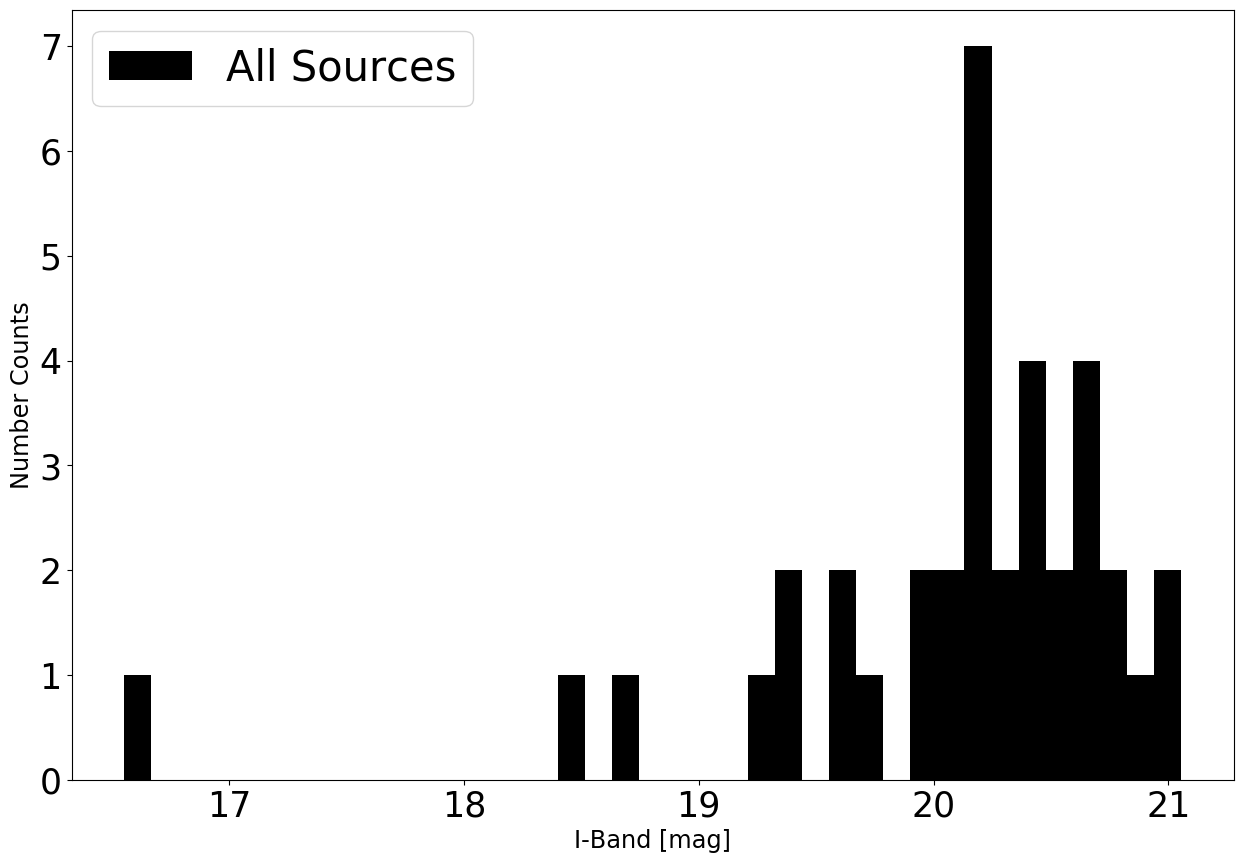

In [12]:
%run ds9_region.ipynb
create_ds9_region(weird_sources['ra'], weird_sources['dec'], '/home/yobd/Documents/SourcesForAnalysis/weirdCMDsources.reg')

plt.figure(1, figsize = (15, 10))
n_all, bins, patches = plt.hist(weird_sources['I_MAG_SUBARU'], bins = bin_number, histtype = 'barstacked', color = 'black', label = 'All Sources')
plt.xlabel("I-Band [mag]", fontsize = 'xx-large')
plt.ylabel("Number Counts", fontsize = 'xx-large')
plt.legend(fontsize = 30, loc = 2)
plt.show()

0.89 0.8600000000000001 1.5600000000000005 1.91
-0.3499999999999994 -0.029999999999999916 0.3582999999999994


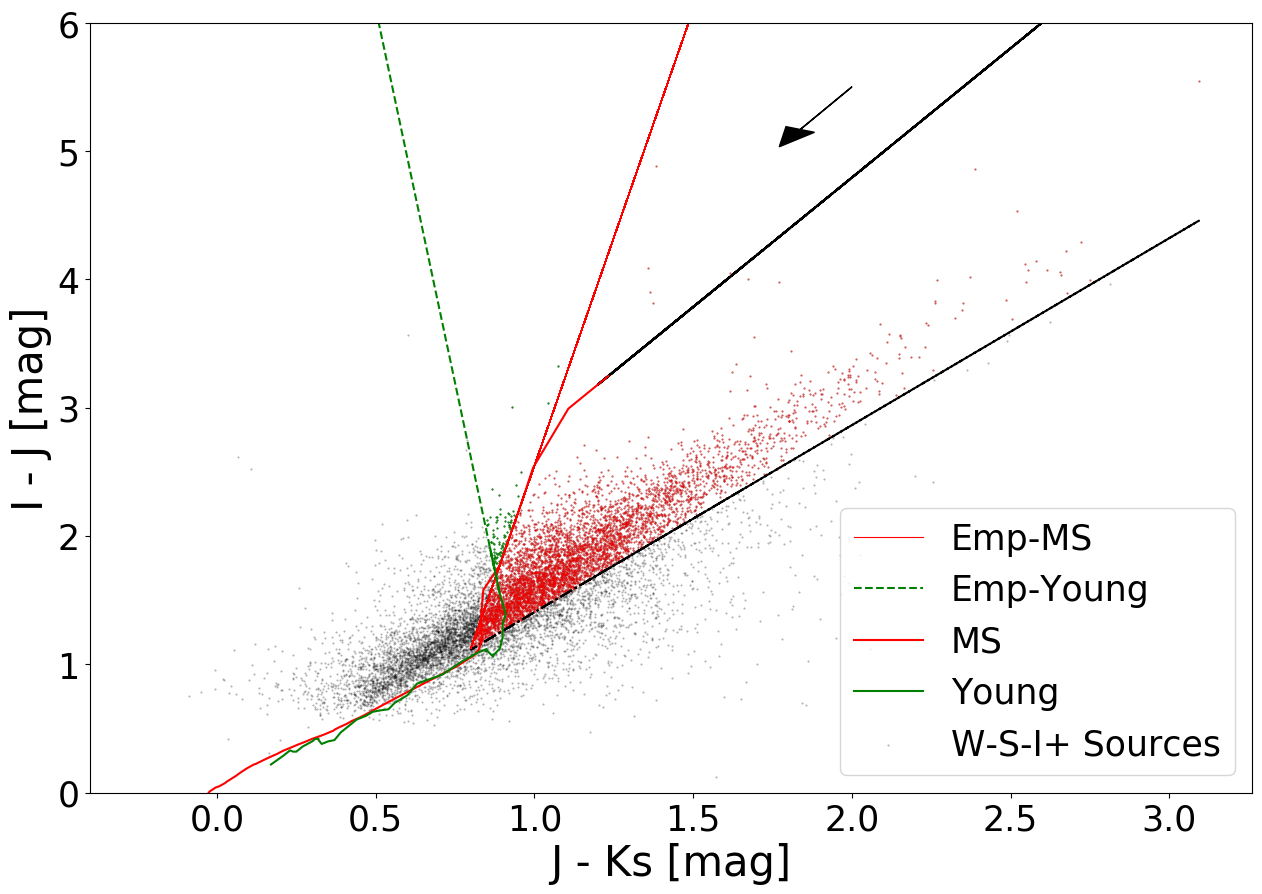

/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


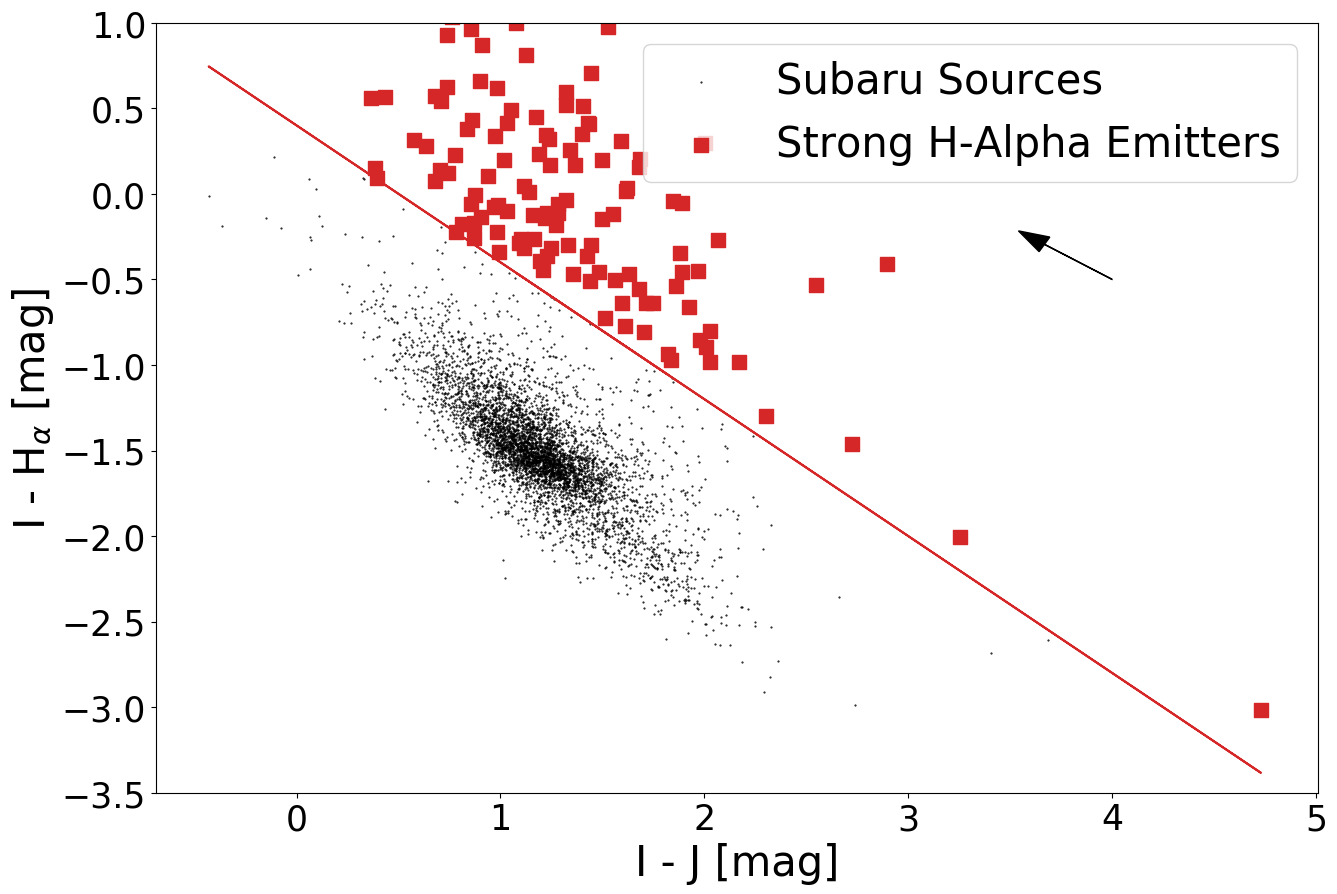

In [21]:
# The empirical colors from ...

emp_colors = ascii.read('/home/yobd/Documents/CatalogsCrA/New_Run/Emp_Colours_MS.dat')

# The empirical colors for young stars from ...

emp_colors_young = ascii.read('/home/yobd/Documents/CatalogsCrA/New_Run/Emp_Colours_Young.dat')

# This part of the code generates the extinction line in the color-magnitude parameter space
# It will be used to apply extinction to all sources which fall inside the selection space of the color-magnitude diagram (those to the right of the line)

# The reference wavelength for the Suprime-Cam I-band

#i_lam = 7635.0

# The reference wavelength for the DENIS I-band

i_lam = 7897.12

# The reference wavelength for the H-Alpha filter

h_alpha_lam = 6566.81

# The reference wavelength for the VHS J-band

j_lam = 12540.9

# The reference wavelength for the VHS K-band

k_lam = 21487.7

# The first coordinates correspond to a source with zero extinction and the second coordinates to a source with one mag of extinction

x_ext_0 = 0

y_ext_0 = 0

x_ext_1 = x_ext_0 + ext_lambda(j_lam, 1, 3.1) - ext_lambda(k_lam, 1, 3.1)

y_ext_1 = y_ext_0 + ext_lambda(i_lam, 1, 3.1) - ext_lambda(j_lam, 1, 3.1)

x_i_h_alpha_ext_1 = x_ext_0 + ext_lambda(i_lam, 1, 3.1) - ext_lambda(j_lam, 1, 3.1)

y_i_h_alpha_ext_1 = y_ext_0 + ext_lambda(i_lam, 1, 3.1) - ext_lambda(h_alpha_lam, 1, 3.1)

# The line between the two points mentioned above

a_ext, b_ext, c_ext = get_line_eq(x_ext_0, x_ext_1, y_ext_0, y_ext_1)

# The module of the above line corresponds to one unity of extinction

one_mag = np.sqrt( ( (x_ext_0 - x_ext_1) ** 2) + ( (y_ext_0 - y_ext_1) ** 2) )

# The slope of the extinction line

slope = - a_ext / b_ext

# The reddening vector for the I - H-Alpha vs. I - J plot

a_ext_h_alpha, b_ext_h_alpha, c_ext_h_alpha = get_line_eq(x_ext_0, x_i_h_alpha_ext_1, y_ext_0, y_i_h_alpha_ext_1)

# In order to obtain the J - Ks empirical colors we must subtract these two colors

emp_x = emp_colors['V-Ks'] - emp_colors['V-J']

# In order to obtain the I - J empirical colors we must subtract these two colors

emp_y = emp_colors['V-J'] - emp_colors['V-Ic']

# In order to obtain the I - Ks empirical colors we must subtract these two colors

emp_y_I_K = emp_colors['V-Ks'] - emp_colors['V-Ic']

# The line between the two last points of the vector created above

a, b, c = get_line_eq(emp_x[len(emp_x) - 2], emp_x[len(emp_x) - 1], emp_y[len(emp_y) - 2], emp_y[len(emp_y) - 1])

# The line that passes through the first half of points of the vector created above

a_2, b_2, c_2 = get_line_eq(emp_x[1], emp_x[40], emp_y[1], emp_y[40])

# The line that passes through the vertical segment of the vector created above

a_3, b_3, c_3 = get_line_eq(emp_x[61], emp_x[62], emp_y[61], emp_y[62])

# In order to obtain the J - Ks empirical colors we must subtract these two colors

emp_x_young = emp_colors_young['J-H'] + emp_colors_young['H-Ks']

# In order to obtain the I - J empirical colors we must subtract these two colors

emp_y_young = emp_colors_young['V-Ks'] - emp_colors_young['V-Ic'] - emp_colors_young['H-Ks'] - emp_colors_young['J-H']

# In order to obtain the I - J empirical colors we must subtract these two colors

emp_y_young_I_K = emp_colors_young['V-Ks'] - emp_colors_young['V-Ic']

# The line between the two last points of the vector created above

a_young, b_young, c_young = get_line_eq(emp_x_young[len(emp_x_young) - 6], emp_x_young[len(emp_x_young) - 5], emp_y_young[len(emp_y_young) - 6], emp_y_young[len(emp_y_young) - 5])
print(emp_x_young[len(emp_x_young) - 6], emp_x_young[len(emp_x_young) - 5], emp_y_young[len(emp_y_young) - 6], emp_y_young[len(emp_y_young) - 5])
print(a_young, b_young, c_young)

# Creates a copy of the cross-match catalog between the SUBARU I-band and H-Alpha catalogs
# This will be used later for the second method of extinction estimation for the SUBARU sources

cross_match_c_t_h_alpha = Table.copy(cross_match_h_alpha)

# The VHSDR6 catalog has a default value for blank entries of < - 999999
# This removes those empty values

cross_match_c_t_h_alpha.remove_rows([cross_match_c_t_h_alpha['ksAperMag3'] < - 100])

# The I - J color of the sources

color_c_t_h_alpha_I_J = np.array(cross_match_c_t_h_alpha['I_MAG_SUBARU'] - cross_match_c_t_h_alpha['jAperMag3'])

# The I - Ks color of the sources

color_c_t_h_alpha_I_K = np.array(cross_match_c_t_h_alpha['I_MAG_SUBARU'] - cross_match_c_t_h_alpha['ksAperMag3'])

# The J - Ks color of the sources

color_c_t_h_alpha_J_K = np.array(cross_match_c_t_h_alpha['jAperMag3'] - cross_match_c_t_h_alpha['ksAperMag3'])

#ind_sort = np.argsort(color_c_t_h_alpha_J_K)

#color_c_t_h_alpha_J_K = color_c_t_h_alpha_J_K[ind_sort]

#color_c_t_h_alpha_I_J = color_c_t_h_alpha_I_J[ind_sort]

#color_c_t_h_alpha_I_K = color_c_t_h_alpha_I_K[ind_sort]

# The region of the parameter space pertaining to redder, main-sequence SUBARU I-band sources than those limited by the line described above

in_box = (a_3 * color_c_t_h_alpha_J_K + b_3 * color_c_t_h_alpha_I_J + c_3 <= 0) & (a_2 * color_c_t_h_alpha_J_K + b_2 * color_c_t_h_alpha_I_J + c_2 >= 0)

# The region of the parameter space pertaining to redder, younger SUBARU I-band sources than those limited by the line described above

in_box_young = (a_3 * color_c_t_h_alpha_J_K + b_3 * color_c_t_h_alpha_I_J + c_3 >= 0) & (a_young * color_c_t_h_alpha_J_K + b_young * color_c_t_h_alpha_I_J + c_young <= 0)

# Initializes the array where the extinction values of each source inside the selected paramater space will be saved

extinctions = np.zeros(len(color_c_t_h_alpha_J_K[in_box]), dtype = np.float64)

extinctions_i = np.zeros(len(color_c_t_h_alpha_J_K[in_box]), dtype = np.float64)

extinctions_j = np.zeros(len(color_c_t_h_alpha_J_K[in_box]), dtype = np.float64)

extinctions_k = np.zeros(len(color_c_t_h_alpha_J_K[in_box]), dtype = np.float64)

# Initializes the counter for the WHILE cycle

i = 0

# During the WHILE cycle, the extinction for each source inside the selected parameter space will be estimated

while i < len(color_c_t_h_alpha_J_K[in_box]):
    
    # y[0] is the reddening extinction line which passes on the item's coordinates
    # y[1] is the model line
    # The function will calculate the interception of these lines (this interception will be the point the item's coords should be if it had not been reddened)
    
    def f(x):
        y = np.zeros(2)
        y[0] = a_ext * (x[0] - color_c_t_h_alpha_J_K[in_box][i]) + b_ext * (x[1] - color_c_t_h_alpha_I_J[in_box][i]) + c_ext
        y[1] = a_3 * x[0] + b_3 * x[1] + c_3
        return y
    
    # x0 is needed just as an input for the FSOLVE function
    
    x0 = np.array([0, 0])
    
    # Retrieves two values:
    # solution[0] - The xx coordinate of the interception point
    # solution[1] - The yy coordinate of the interception point
    
    solution = fsolve(f, x0)
    
    # The extinction magnitude of the current item (in the visible)
    
    av_mag = np.sqrt( ( (solution[0] - color_c_t_h_alpha_J_K[in_box][i]) ** 2) + ( (solution[1] - color_c_t_h_alpha_I_J[in_box][i]) ** 2) ) / one_mag
    
    # The bolometric extinction magnitude of the current item
    
    extinctions[i] = ext_lambda(6560, av_mag, 3.1)
    
    extinctions_i[i] = ext_lambda(i_lam, av_mag, 3.1)
    
    extinctions_j[i] = ext_lambda(j_lam, av_mag, 3.1)
    
    extinctions_k[i] = ext_lambda(k_lam, av_mag, 3.1)
    
    # Iteration of the cycle
    
    i = i + 1

# Initializes the array where the extinction values of each source inside the selected paramater space will be saved

extinctions_young = np.zeros(len(color_c_t_h_alpha_J_K[in_box_young]), dtype = np.float64)

extinctions_i_young = np.zeros(len(color_c_t_h_alpha_J_K[in_box_young]), dtype = np.float64)

extinctions_j_young = np.zeros(len(color_c_t_h_alpha_J_K[in_box_young]), dtype = np.float64)

extinctions_k_young = np.zeros(len(color_c_t_h_alpha_J_K[in_box_young]), dtype = np.float64)

# Initializes the counter for the WHILE cycle

i = 0

# During the WHILE cycle, the extinction for each source inside the selected parameter space will be estimated

while i < len(color_c_t_h_alpha_J_K[in_box_young]):
    
    # y[0] is the reddening extinction line which passes on the item's coordinates
    # y[1] is the model line
    # The function will calculate the interception of these lines (this interception will be the point the item's coords should be if it had not been reddened)
    
    def f(x):
        y = np.zeros(2)
        y[0] = a_ext * (x[0] - color_c_t_h_alpha_J_K[in_box_young][i]) + b_ext * (x[1] - color_c_t_h_alpha_I_J[in_box_young][i]) + c_ext
        y[1] = a_young * x[0] + b_young * x[1] + c_young
        return y
    
    # x0 is needed just as an input for the FSOLVE function
    
    x0 = np.array([0, 0])
    
    # Retrieves two values:
    # solution[0] - The xx coordinate of the interception point
    # solution[1] - The yy coordinate of the interception point
    
    solution = fsolve(f, x0)
    
    # The extinction magnitude of the current item (in the visible)
    
    av_mag = np.sqrt( ( (solution[0] - color_c_t_h_alpha_J_K[in_box_young][i]) ** 2) + ( (solution[1] - color_c_t_h_alpha_I_J[in_box_young][i]) ** 2) ) / one_mag
    
    # The bolometric extinction magnitude of the current item
    
    extinctions_young[i] = ext_lambda(6560, av_mag, 3.1)
    
    extinctions_i_young[i] = ext_lambda(i_lam, av_mag, 3.1)
    
    extinctions_j_young[i] = ext_lambda(j_lam, av_mag, 3.1)
    
    extinctions_k_young[i] = ext_lambda(k_lam, av_mag, 3.1)
    
    # Iteration of the cycle
    
    i = i + 1

# Initializes the column with the updated H-Alpha magnitude values

cross_match_c_t_h_alpha['H_ALPHA_NEW'] = cross_match_c_t_h_alpha['H_ALPHA']

# Applies the vector of estimated extinction only to the entries in the catalog which fall under the selection criteria parameter space

cross_match_c_t_h_alpha['H_ALPHA_NEW'][in_box] = cross_match_c_t_h_alpha['H_ALPHA'][in_box] - extinctions

cross_match_c_t_h_alpha['H_ALPHA_NEW'][in_box_young] = cross_match_c_t_h_alpha['H_ALPHA'][in_box_young] - extinctions_young

cross_match_c_t_h_alpha['I_MAG_SUBARU_NEW'] = cross_match_c_t_h_alpha['I_MAG_SUBARU']

cross_match_c_t_h_alpha['I_MAG_SUBARU_NEW'][in_box] = cross_match_c_t_h_alpha['I_MAG_SUBARU'][in_box] - extinctions_i

cross_match_c_t_h_alpha['I_MAG_SUBARU_NEW'][in_box_young] = cross_match_c_t_h_alpha['I_MAG_SUBARU'][in_box_young] - extinctions_i_young

cross_match_c_t_h_alpha['jAperMag3_NEW'] = cross_match_c_t_h_alpha['jAperMag3']

cross_match_c_t_h_alpha['jAperMag3_NEW'][in_box] = cross_match_c_t_h_alpha['jAperMag3'][in_box] - extinctions_j

cross_match_c_t_h_alpha['jAperMag3_NEW'][in_box_young] = cross_match_c_t_h_alpha['jAperMag3'][in_box_young] - extinctions_j_young

cross_match_c_t_h_alpha['ksAperMag3_NEW'] = cross_match_c_t_h_alpha['ksAperMag3']

cross_match_c_t_h_alpha['ksAperMag3_NEW'][in_box] = cross_match_c_t_h_alpha['ksAperMag3'][in_box] - extinctions_k

cross_match_c_t_h_alpha['ksAperMag3_NEW'][in_box_young] = cross_match_c_t_h_alpha['ksAperMag3'][in_box_young] - extinctions_k_young

# Initializes and builds an extinction column for the catalog

cross_match_c_t_h_alpha['EXT'] = 0.0

cross_match_c_t_h_alpha['EXT'][in_box] = extinctions

cross_match_c_t_h_alpha['EXT'][in_box_young] = extinctions_young

plt.rc('xtick',labelsize = 25)
plt.rc('ytick',labelsize = 25)

plt.figure(1, figsize = (15, 10))
plt.scatter(color_c_t_h_alpha_J_K, color_c_t_h_alpha_I_J, marker = '.', s = 1, color = 'k', label = 'W-S-I+ Sources', alpha = 0.3)
plt.scatter(color_c_t_h_alpha_J_K[in_box], color_c_t_h_alpha_I_J[in_box], marker = '.', s = 1, color = 'r', alpha = 0.5)
plt.scatter(color_c_t_h_alpha_J_K[in_box_young], color_c_t_h_alpha_I_J[in_box_young], marker = '.', s = 1, color = 'g')
#plt.scatter(cross_match_h_alpha_dance['jAperMag3'] - cross_match_h_alpha_dance['ksAperMag3'], cross_match_h_alpha_dance['I_MAG_SUBARU'] - cross_match_h_alpha_dance['jAperMag3'], marker = 'D', label = 'DANCE Members', color = 'b')
#plt.scatter(models['H-Ks'], models['J-H'], marker = '.', s = 1)
#plt.scatter(emp_colors['H-Ks'], emp_colors['J-H'], marker = '.')
color_c_t_h_alpha_J_K_early_type = np.copy(color_c_t_h_alpha_J_K[color_c_t_h_alpha_J_K > 1.2])
plt.plot(color_c_t_h_alpha_J_K_early_type, (- c - a * color_c_t_h_alpha_J_K_early_type) / b, color = 'k', linestyle = '--')#, label = 'Emp-MS Later Type')
color_c_t_h_alpha_J_K_later_type = np.copy(color_c_t_h_alpha_J_K[color_c_t_h_alpha_J_K > 0.8])
plt.plot(color_c_t_h_alpha_J_K_later_type, (- c_2 - a_2 * color_c_t_h_alpha_J_K_later_type) / b_2, color = 'k', linestyle = '-.')#, label = 'Emp-MS Early Type')
color_c_t_h_alpha_J_K_ms = np.copy(color_c_t_h_alpha_J_K[color_c_t_h_alpha_J_K > 0.8])
plt.plot(color_c_t_h_alpha_J_K_ms, (- c_3 - a_3 * color_c_t_h_alpha_J_K_ms) / b_3, color = 'r', linewidth = 0.8, label = 'Emp-MS')
emp_x_young_extension = np.copy(emp_x_young[emp_x_young < 0.9])
plt.plot(emp_x_young_extension, (- c_young - a_young * emp_x_young_extension) / b_young, color = 'g', linestyle = '--', label = 'Emp-Young')
plt.plot(emp_x, emp_y, label = 'MS', color = 'r')
plt.plot(emp_x_young, emp_y_young, label = 'Young', color = 'g')
#plt.plot(color_c_t_h_alpha_I_J, (- c_ext - a_ext * color_c_t_h_alpha_I_J) / b_ext, color = 'k')
plt.arrow(2, 5.5, x_ext_0 - x_ext_1, y_ext_0 - y_ext_1, head_width = 0.1, color = 'k')
plt.xlabel('J - Ks [mag]', fontsize = 30)
plt.ylabel('I - J [mag]', fontsize = 30)
plt.legend(fontsize = 25, loc = 4)
#plt.xlim(-1, 6)
#plt.ylim(-2, 14)
#plt.xlim(0, 3)
plt.ylim(0, 6)
plt.show()

'''
plt.figure(2, figsize = (8, 10))
plt.scatter(color_c_t_h_alpha_J_K, color_c_t_h_alpha_I_K, marker = '.', s = 1)
#plt.scatter(color_c_t_h_alpha_I_J[in_box], color_c_t_h_alpha_I_K[in_box], marker = '.', s = 1)
#plt.scatter(models['H-Ks'], models['J-H'], marker = '.', s = 1)
#plt.scatter(emp_colors['H-Ks'], emp_colors['J-H'], marker = '.')
plt.plot(color_c_t_h_alpha_I_J, (- c - a * color_c_t_h_alpha_I_J) / b, color = 'k', linestyle = '--')
plt.plot(emp_x, emp_y_I_K, color = 'r', label = 'MS')
plt.plot(emp_x_young, emp_y_young_I_K, color = 'k', label = 'Young')
plt.plot(color_c_t_h_alpha_I_J, (- c_ext - a_ext * color_c_t_h_alpha_I_J) / b_ext, color = 'k')
#plt.arrow(1, 8, x_ext_0 - x_ext_1, y_ext_0 - y_ext_1, head_width = 0.1, color = 'k')
plt.xlabel('J - Ks', fontsize = 'xx-large')
plt.ylabel('I - Ks', fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large', loc = 4)
plt.show()
'''

# The I - J color of the sources which fall inside the color-magnitude selection criteria

I_H_alpha_color_I_J = np.array(cross_match_c_t_h_alpha['I_MAG_SUBARU_NEW'][in_box] - cross_match_c_t_h_alpha['jAperMag3_NEW'][in_box])

I_H_alpha_color_I_J_young = np.array(cross_match_c_t_h_alpha['I_MAG_SUBARU_NEW'][in_box_young] - cross_match_c_t_h_alpha['jAperMag3_NEW'][in_box_young])

I_H_alpha_color_I_J = np.concatenate((I_H_alpha_color_I_J, I_H_alpha_color_I_J_young))

# Their corresponding I - H-Alpha values

I_H_alpha = np.array(cross_match_c_t_h_alpha['I_MAG_SUBARU_NEW'][in_box] - cross_match_c_t_h_alpha['H_ALPHA_NEW'][in_box])

I_H_alpha_young = np.array(cross_match_c_t_h_alpha['I_MAG_SUBARU_NEW'][in_box_young] - cross_match_c_t_h_alpha['H_ALPHA_NEW'][in_box_young])

I_H_alpha = np.concatenate((I_H_alpha, I_H_alpha_young))

# The mean value of their I - H-Alpha values

I_H_mean = np.nanmean(I_H_alpha)

# The standard deviation of their I - H-Alpha values

I_H_std = np.nanstd(I_H_alpha)

new_cross_match_h_alpha_dance = cross_match(cross_match_c_t_h_alpha, 'ra', 'dec', dance, 'RA_ICRS', 'DE_ICRS', 1, sep = True)

new_cross_match_h_alpha_dance = reset_main_catalog_columns(cross_match_c_t_h_alpha, new_cross_match_h_alpha_dance)

new_cross_match_h_alpha_dance.sort('d2d')

# Removes the duplicate entries from the cross-matched catalog
new_cross_match_h_alpha_dance = unique(new_cross_match_h_alpha_dance, keys = ['RA_ICRS', 'DE_ICRS'], keep = 'first')

new_cross_match_h_alpha_dance.remove_rows([new_cross_match_h_alpha_dance['EXT'] == 0.0])

#full_color_interp = interpolate.interp1d(full_mass, full_color)

I_H_alpha_color_mean_I_J = np.nanmean(I_H_alpha_color_I_J)

I_H_alpha_color_std_I_J = np.nanstd(I_H_alpha_color_I_J)

#x = I_H_alpha_color[I_H_alpha < I_H_mean + I_H_std]

#y = I_H_alpha[I_H_alpha < I_H_mean + I_H_std]

#mean_x = np.nanmean(x)

#std_x = np.nanstd(x)

#y = y[np.logical_and(x > mean_x - 2 * std_x, x < mean_x + 2 * std_x)]

#x = x[np.logical_and(x > mean_x - 2 * std_x, x < mean_x + 2 * std_x)]

x = np.array([-1, 2])

y = np.array([0, - 2.4])

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

h_alpha_selec = (I_H_alpha - p(I_H_alpha_color_I_J) >= 1.2 + 24.6)

# The color of sources with bright H-Alpha emission

strong_h_alpha_color_I_J = I_H_alpha_color_I_J[h_alpha_selec]

# Their respective I - H-Alpha values

strong_h_alpha = I_H_alpha[h_alpha_selec]

# Creates a copy of the catalog with sources which pass I vs. I - J selection criteria and which have an H-Alpha counterpart

bright_h_alpha = Table.copy(vstack([cross_match_c_t_h_alpha[in_box], cross_match_c_t_h_alpha[in_box_young]]))

# Removes the entries of sources below a given limit, keeping only sources with strong H-Alpha emission

bright_h_alpha = bright_h_alpha[h_alpha_selec]

# Writes the sources from the SUBARU I-band catalog with VHS J-band which have strong H-Alpha emission

#ascii.write(bright_h_alpha, '/home/yobd/Documents/Selection/H_Alpha_Bright_Sources_4_3_dot_0.dat', format = 'csv')

plt.figure(3, figsize = (15, 10))
plt.scatter(I_H_alpha_color_I_J, I_H_alpha - 24.6, marker = '.', s = 1, label = 'Subaru Sources', color = 'k')
plt.scatter(strong_h_alpha_color_I_J, strong_h_alpha - 24.6, marker = 's', s = 90, label = 'Strong H-Alpha Emitters', color = 'tab:red')
#plt.scatter(new_cross_match_h_alpha_dance['I_MAG_SUBARU_NEW'] - new_cross_match_h_alpha_dance['jAperMag3_NEW'], new_cross_match_h_alpha_dance['I_MAG_SUBARU_NEW'] - new_cross_match_h_alpha_dance['H_ALPHA_NEW'] - 24.6, marker = 'D', label = 'DANCE Members', color = 'b')
#plt.scatter(x, y, s = 1, alpha = 0.5)
#plt.plot(bt_color_I_J, bt_I_h_alpha, color = 'k')
#plt.plot(I_H_alpha_color_I_J, p(I_H_alpha_color_I_J), "k", linestyle = '--')
plt.plot(I_H_alpha_color_I_J, p(I_H_alpha_color_I_J) + 1.2, "tab:red", linestyle = '-')
plt.arrow(4, -0.5, x_ext_0 - x_i_h_alpha_ext_1, y_ext_0 - y_i_h_alpha_ext_1, head_width = 0.1, color = 'k')
plt.xlabel('I - J [mag]', fontsize = 30)
plt.ylabel('I - ' + r'H$_{\alpha}$' + ' [mag]', fontsize = 30)
plt.legend(fontsize = 30, loc = 1)
plt.ylim(-3.5, 1)
plt.show()

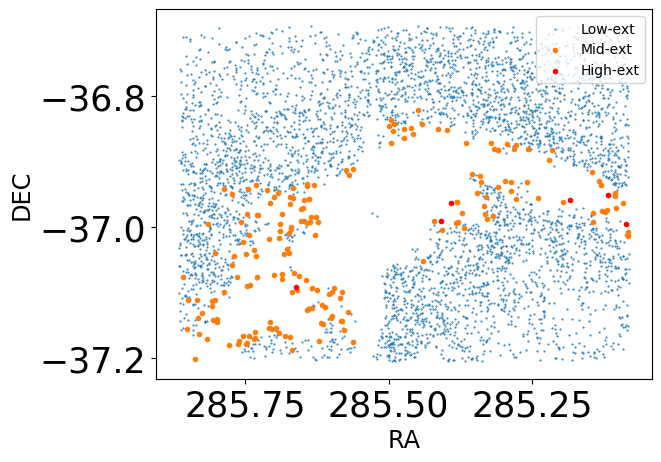

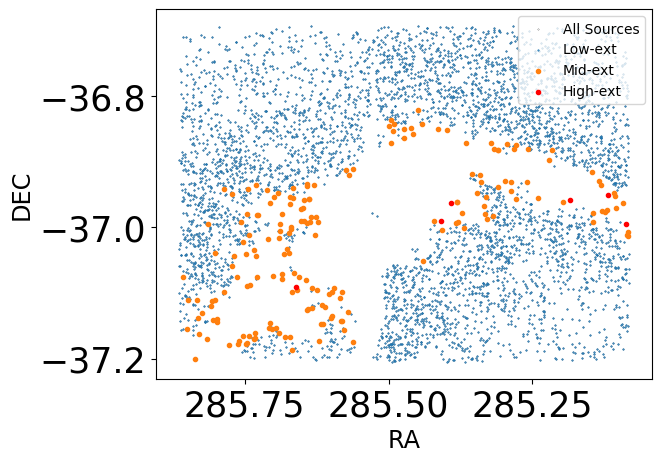

<Figure size 640x480 with 0 Axes>

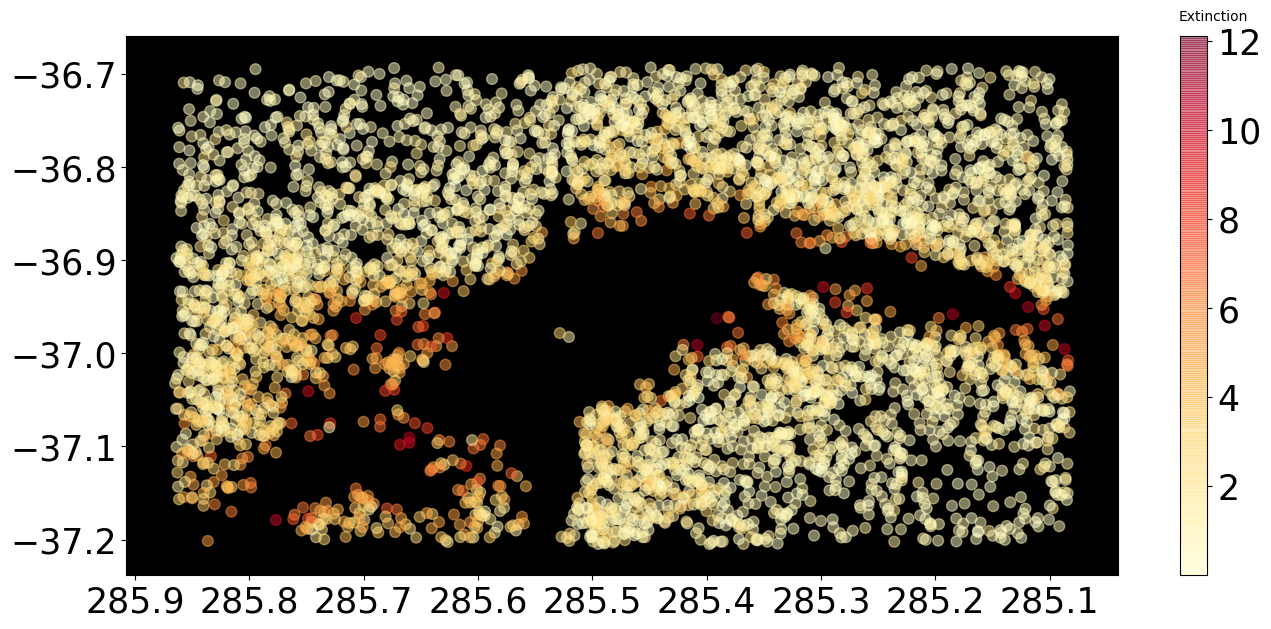

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


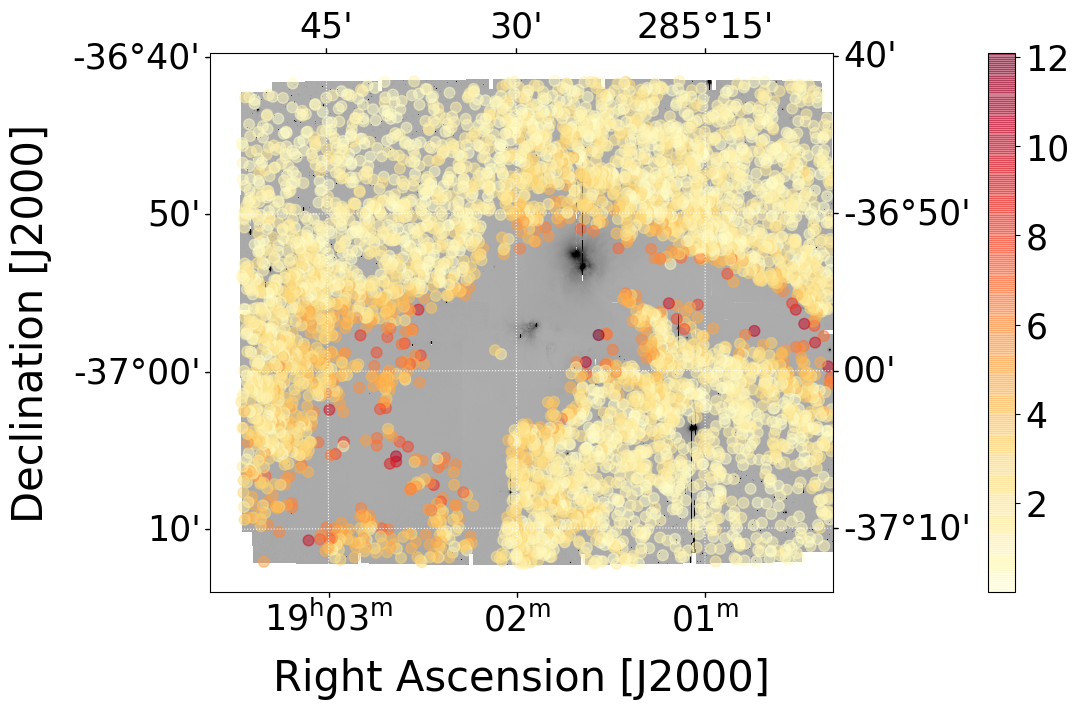

In [30]:
low_ext = cross_match_c_t_h_alpha[in_box][cross_match_c_t_h_alpha['EXT'][in_box] < 5]
mid_ext = cross_match_c_t_h_alpha[in_box][np.logical_and(cross_match_c_t_h_alpha['EXT'][in_box] >= 5, cross_match_c_t_h_alpha['EXT'][in_box] <= 10)]
high_ext = cross_match_c_t_h_alpha[in_box][cross_match_c_t_h_alpha['EXT'][in_box] > 10]

plt.figure(1)
plt.scatter(low_ext['ra'], low_ext['dec'], marker = '.', label = 'Low-ext', s = 1)
plt.scatter(mid_ext['ra'], mid_ext['dec'], marker = '.', label = 'Mid-ext')
plt.scatter(high_ext['ra'], high_ext['dec'], marker = '.', label = 'High-ext', c = 'r')
plt.gca().invert_xaxis()
plt.xlabel('RA', fontsize = 'xx-large')
plt.ylabel('DEC', fontsize = 'xx-large')
plt.legend(fontsize = 'medium', loc = 1)
plt.show()

plt.figure(2)
plt.scatter(cross_match_c_t_h_alpha['ra'][in_box], cross_match_c_t_h_alpha['dec'][in_box], marker = '.', s = 0.1, label = 'All Sources', color = 'k')
plt.scatter(low_ext['ra'], low_ext['dec'], marker = '.', label = 'Low-ext', s = 1)
plt.scatter(mid_ext['ra'], mid_ext['dec'], marker = '.', label = 'Mid-ext')
plt.scatter(high_ext['ra'], high_ext['dec'], marker = '.', label = 'High-ext', c = 'r')
plt.gca().invert_xaxis()
plt.xlabel('RA', fontsize = 'xx-large')
plt.ylabel('DEC', fontsize = 'xx-large')
plt.legend(fontsize = 'medium', loc = 1)
plt.show()

plt.figure(3)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 7))
c = ax.scatter(cross_match_c_t_h_alpha['ra'][in_box], cross_match_c_t_h_alpha['dec'][in_box], c = cross_match_c_t_h_alpha['EXT'][in_box], edgecolor = None, s = 60, alpha = 0.5, cmap = plt.cm.YlOrRd, zorder = 1, label = 'Extinction')
cbar = plt.colorbar(c)
cbar.set_label('Extinction', labelpad = - 35, y = 1.05, rotation = 0)
ax.set_facecolor('k')
plt.gca().invert_xaxis()
plt.show()

from astropy.io import fits
from matplotlib.colors import LogNorm
from astropy.wcs import WCS

#Opens the .fits file
hdu = fits.open('/home/yobd/Documents/AstroAliSciObj/Montaged_Filters/W-S-I+_Montaged_Median/W-S-I+_Median_Montaged_Mosaic.fits')

#Variable for the header of the fits
head = hdu[0].header

#Variable for the image of the fits
im = hdu[0].data

wcs_head = WCS(head)

xpix = np.linspace(0, len(im[0]), len(im[0]))

ypix = np.linspace(0, len(im[1]), len(im[1]))

wx, wy = wcs_head.wcs_pix2world(xpix, ypix, 1)

ra_2_pix, dec_2_pix = wcs_head.all_world2pix(cross_match_c_t_h_alpha['ra'][in_box], cross_match_c_t_h_alpha['dec'][in_box], 1)

plt.rcdefaults()

plt.rc('xtick',labelsize = 25)
plt.rc('ytick',labelsize = 25)

plt.figure(4, figsize = (20, 7))
ax = plt.subplot(projection = wcs_head)
ax.imshow(im, cmap = plt.cm.Greys, norm = LogNorm(vmin = 500, vmax = 10000))
#plt.colorbar()
#c = ax.scatter(cross_match_c_t_h_alpha['ra'][in_box], cross_match_c_t_h_alpha['dec'][in_box], c = cross_match_c_t_h_alpha['EXT'][in_box], edgecolor = None, s = 60, alpha = 0.5, cmap = plt.cm.YlOrRd, zorder = 1, label = 'Extinction')
c = ax.scatter(ra_2_pix, dec_2_pix, c = cross_match_c_t_h_alpha['EXT'][in_box], edgecolor = None, s = 60, alpha = 0.5, cmap = plt.cm.YlOrRd, zorder = 1, label = 'Extinction')
overlay = ax.get_coords_overlay('icrs')
overlay.grid(color = 'white', ls = 'dotted')
#overlay[0].set_axislabel('Right Ascension (J2000)', fontsize = 'xx-large', axis_direction = 'top')
#overlay[1].set_axislabel('Declination (J2000)', fontsize = 'xx-large')
ax.set_xlabel('Right Ascension [J2000]', fontsize = 30)
ax.set_ylabel('Declination [J2000]', fontsize = 30)
plt.colorbar(c, ax = ax, pad = 0.1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:234: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:235: RuntimeWarning: invalid value encountered in greater


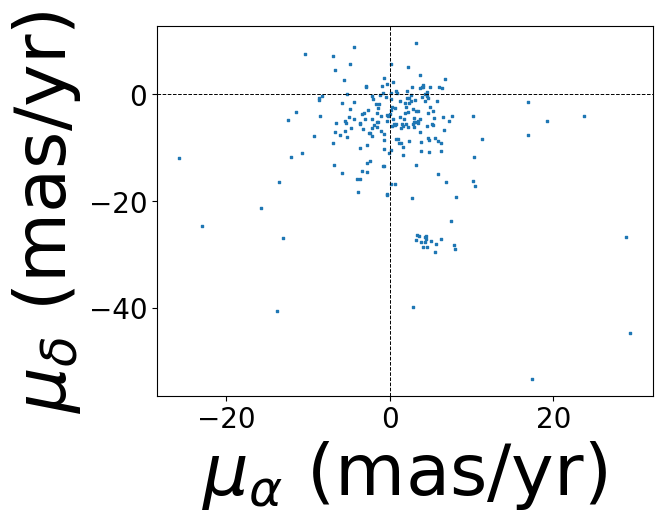

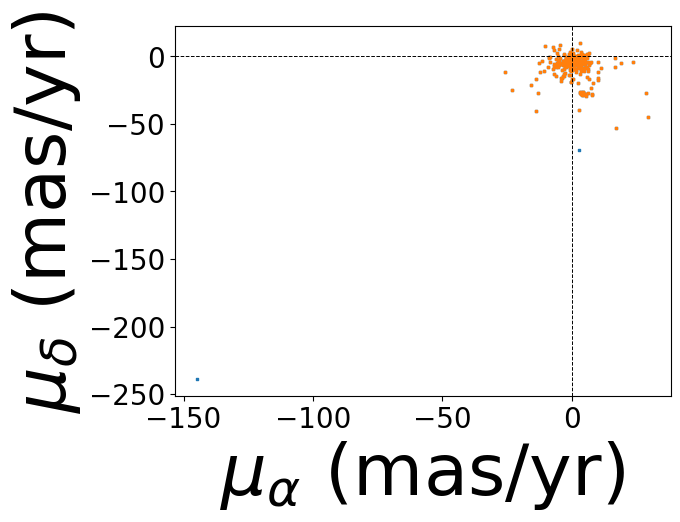

/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False
/home/yobd/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


4.245433333333334
Mean proper motions: 4.245433333333334 +/- 1.4886751085743621 -27.7411 +/- 0.8637728617331447
Ellipse center: 4.426 +/- 1.4886751085743621 -27.684 +/- 0.8637728617331447


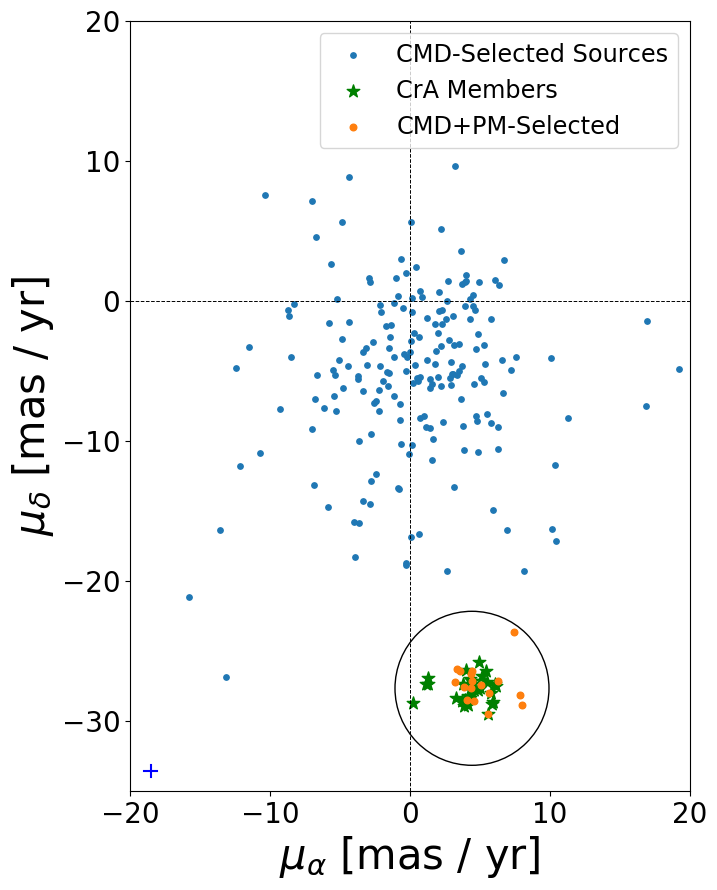

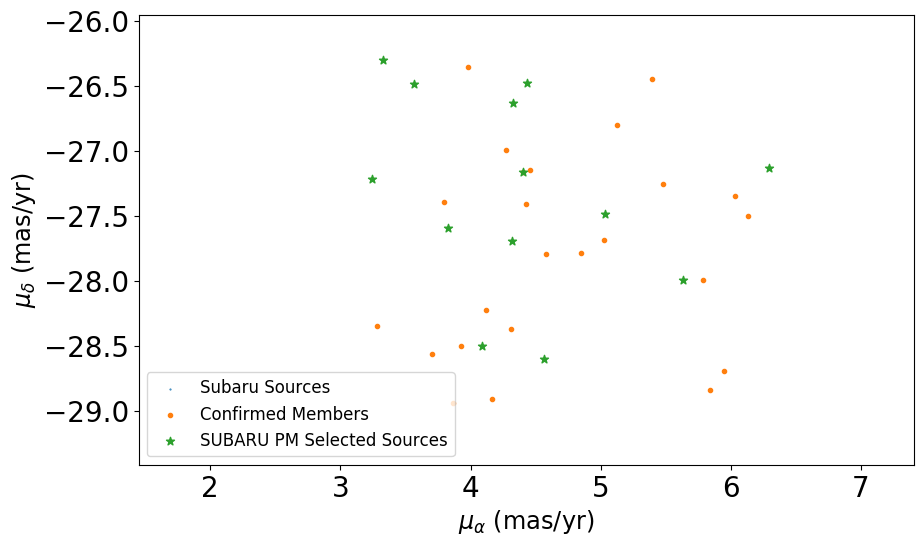

In [14]:
%run Proper_Motions.ipynb

from astropy.io import ascii
from astropy.table import setdiff

path = '/home/yobd/Documents/Selection/W-S-I+_Selected_Sources_CMD.dat'

#path = '/home/yobd/Documents/Photometry_Output/Full_Catalog_ZP_CT_Aper_Model.dat'

Gaia_path = "/home/yobd/Documents/CatalogsCrA/New_Run/Gaia_DR3.dat"

pm_ra = 'pmRA'

pm_dec = 'pmDE'

proper_motions_plot(path, 'ra', 'dec', Gaia_path, 'RA_ICRS', 'DE_ICRS', pm_ra, pm_dec, 1, 3)

accepted = ascii.read('/home/yobd/Documents/ProperMotions/accepted.dat')

# Spectroscopically confirmed CrA members
confirmed = ascii.read('/home/yobd/Documents/SourcesForAnalysis/final_confirmed_table.dat')

pm_ra_mean = np.nanmean(confirmed['pmRA'])

pm_dec_mean = np.nanmean(confirmed['pmDE'])

accepted_points = proper_motions_selec(confirmed, 8, accepted)

#ascii.write(accepted_points, '/home/yobd/Documents/Selection/W-S-I+_Selected_Sources_CMD_PM.dat', format = 'csv')

#ascii.write(accepted_points, '/home/yobd/Documents/AstroAliSciObj/W-S-I+_Selected_Sources_PM.dat', format = 'csv')

cat = ascii.read(path)

rejected_points = setdiff(cat, accepted_points, keys = ['ra', 'dec'])

#ascii.write(rejected_points, '/home/yobd/Documents/Selection/W-S-I+_Rejected_Sources_CMD_PM.dat', format = 'csv')

/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False
/home/yobd/.local/lib/python3.7/site-packages/astropy/table/column.py:991: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


Mean: 6.5305599999999995
Standard deviation: 0.2337398619548378


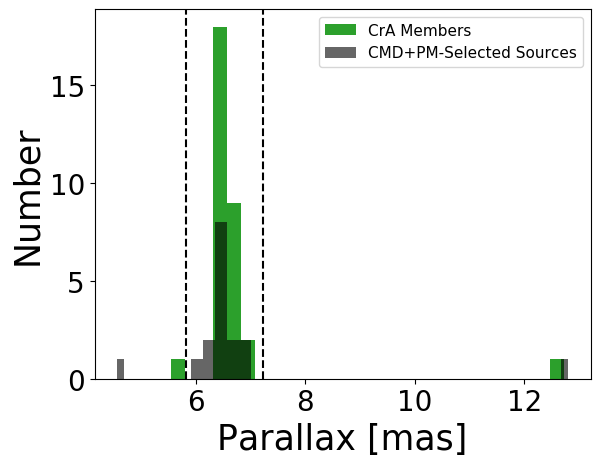

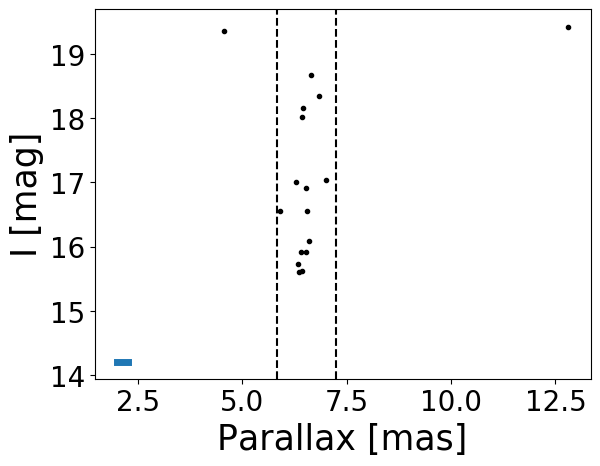

    Names     
--------------
RXJ1901.4-3422
15


In [12]:
%run ParallaxSelec.ipynb

from astropy.io import ascii
from astropy.table import setdiff

path = '/home/yobd/Documents/Selection/W-S-I+_Selected_Sources_CMD_PM.dat'

cat = ascii.read(path)

#Gaia_path = "/home/yobd/Documents/CatalogsCrA/New_Run/Gaia_Search.dat"

#Gaia = ascii.read(Gaia_path)

parallax = 'Plx'

accepted_points = parallax_selec(cat, parallax, 1, 3, plot_dance = True)

#ascii.write(accepted_points, '/home/yobd/Documents/Selection/W-S-I+_Selected_Sources_CMD_PLX_PM.dat', format = 'csv')
print(len(accepted_points))
cat = ascii.read(path)

rejected_points = setdiff(cat, accepted_points, keys = ['ra', 'dec'])

#ascii.write(rejected_points, '/home/yobd/Documents/Selection/W-S-I+_Rejected_Sources_CMD_PLX_PM.dat', format = 'csv')